###### Title: Analysis of Attributes Relating to User Knowledge Levels In a DC Machine Dataset.

Introduction:

<li> Background Information </li>

Knowledge modeling is the process of creating a model of knowledge and/or specifications for a particular process, structure, or entity that is interpretable by a computer. In this case, the dataset models knowledge of students in the field of electrical DC machines that convert direct current electrical energy into mechanical energy through various measures such as study time and study repetition through modeling methods. DC machines are used in applications where a wide range of speeds and precise good regulation is a requirement alongside widespread use of AC machines which use alternating current. <br>

<li> Statement of the Question We Wish to Answer </li>
Which attributes out of the ones given, best predict user knowledge level (UNS) and how are those attributes correlated amongst themselves?
<br><br>

<li> Description of the Dataset </li>
The User Knowledge Modeling Data Set is found in the UCI Machine Learning Repository and was created by Hamdi Tolga Kahraman, Ilhami Colak, and Seref Sagiroglu in 2009. This data set has 258 rows and contains data of the students' knowledge in the field of electrical DC Machines. It has 6 columns, 5 input attributes (quantitative) and 1 target attribute (qualitative). The authors classified the UNS based on the K-nearest neighbour algorithm, also known as K-NN. Descriptions of attributes are listed in the table below: 

<table style="width:100%">
  <tr>
    <th>Attribute</th>
    <th>Description</th>
    <th>Example</th>
  </tr>
  <tr>
    <td>STG</td>
    <td>The degree of study time for goal object materials.</td>
    <td>0, 0.18, 0.276</td>
  </tr>
  <tr>
    <td>SCG</td>
    <td>The degree of repetition number of user for goal object materials. </td>
    <td>0.3, 0.52, 0.259</td>
  </tr>
   <tr>
    <td>STR</td>
    <td>The degree of study time of user for related objects with goal object. </td>
    <td>0.12, 0.78, 0.59</td>
  </tr>
    <tr>
    <td>LPR</td>
    <td>The exam performance of user for related objects with goal object.</td>
    <td>0.65, 0.81, 0.2</td>
  </tr>
    <tr>
    <td>PEG</td>
    <td>The exam performance of user for goal objects. </td>
    <td>0, 0.9, 0.66</td>
  </tr>
    <tr>
    <td>UNS</td>
    <td>The knowledge level of user. </td>
    <td>“Very Low”, “Low”, “Middle”, “High”</td>
  </tr>
</table>



Preliminary exploratory data analysis:

In [1]:
install.packages("ggridges")
library(tidyverse)
library(repr)
library(readxl)
library(GGally)
library (tidymodels)
library(ggplot2)
library(ggridges)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ re

<li> Demonstrate that the dataset can be read from the web into R and combine 2 sheets </li>

In [30]:
#download file here, look for code

user_knowledge_data1 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 2)
user_knowledge_data2 <- read_excel("data/Data_User_Modeling_Dataset.xls", sheet = 3)
user_knowledge_data1$UNS <- as.character(user_knowledge_data1$UNS)
user_knowledge_data1$UNS[user_knowledge_data1$UNS == "very_low"] <- "Very Low"

user_knowledge_data <- rbind (user_knowledge_data1,user_knowledge_data2)


user_knowledge_data <- user_knowledge_data %>%
        mutate(UNS = as_factor(UNS))

user_knowledge_data

New names:
* `` -> ...7
* `` -> ...8

New names:
* `` -> ...7
* `` -> ...8



STG,SCG,STR,LPR,PEG,UNS,...7,...8,Attribute Information:
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<lgl>,<chr>
0.00,0.000,0.00,0.00,0.00,Very Low,NA,NA,"STG (The degree of study time for goal object materails),"
0.08,0.080,0.10,0.24,0.90,High,NA,NA,SCG (The degree of repetition number of user for goal object materails)
0.06,0.060,0.05,0.25,0.33,Low,NA,NA,STR (The degree of study time of user for related objects with goal object)
0.10,0.100,0.15,0.65,0.30,Middle,NA,NA,LPR (The exam performance of user for related objects with goal object)
0.08,0.080,0.08,0.98,0.24,Low,NA,NA,PEG (The exam performance of user for goal objects)
0.09,0.150,0.40,0.10,0.66,Middle,NA,NA,UNS (The knowledge level of user)
0.10,0.100,0.43,0.29,0.56,Middle,NA,NA,NA
0.15,0.020,0.34,0.40,0.01,Very Low,NA,NA,NA
0.20,0.140,0.35,0.72,0.25,Low,NA,NA,NA


<li> Demonstrate the cleaning and wrangling of the data into a tidy format </li>

In [3]:
user_knowledge_data_selected <- select(user_knowledge_data, STG:UNS) 
user_knowledge_data_selected


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.000,0.00,0.00,0.00,Very Low
0.08,0.080,0.10,0.24,0.90,High
0.06,0.060,0.05,0.25,0.33,Low
0.10,0.100,0.15,0.65,0.30,Middle
0.08,0.080,0.08,0.98,0.24,Low
0.09,0.150,0.40,0.10,0.66,Middle
0.10,0.100,0.43,0.29,0.56,Middle
0.15,0.020,0.34,0.40,0.01,Very Low
0.20,0.140,0.35,0.72,0.25,Low


<li> Randomize the dataset and split it into training and testing data </li>

In [61]:
set.seed(2000)

#check if need slice or not 
#justify why we chose 0.75 (one sentence)
user_knowledge_data_randomized <- slice(user_knowledge_data_selected, sample(1:n()))
#user_knowledge_data_randomized

knowledge_data_split <- initial_split(user_knowledge_data_randomized, prop = 0.75, strata = UNS )
knowledge_data_training <- training(knowledge_data_split)   
knowledge_data_testing <- testing(knowledge_data_split)  


head(knowledge_data_training)
head(knowledge_data_testing)




STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.27,0.10,0.10,0.70,0.25,Low
0.37,0.07,0.10,0.41,0.30,Low
0.49,0.34,0.88,0.75,0.71,High
0.09,0.55,0.12,0.78,0.05,Low
0.68,0.61,0.34,0.31,0.23,Low
0.20,0.20,0.70,0.30,0.60,Middle


STG,SCG,STR,LPR,PEG,UNS
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.15,0.275,0.80,0.21,0.81,High
0.15,0.420,0.60,0.15,0.62,Middle
0.40,0.120,0.41,0.10,0.65,Middle
0.66,0.360,0.56,0.40,0.83,High
0.06,0.770,0.72,0.19,0.56,Middle
0.31,0.200,0.46,0.78,0.83,High


<li> Summarize the training data based on the total count of observations and the average of each attribute </li>

In [62]:
user_knowledge_data_selected_summarize <- user_knowledge_data_selected %>% 
summarize(Count = n(), Average_STG = mean(STG), Average_SCG = mean(SCG), Average_STR = mean(STR), Average_LPR = mean(LPR), Average_PEG = mean(PEG))
user_knowledge_data_selected_summarize

Count,Average_STG,Average_SCG,Average_STR,Average_LPR,Average_PEG
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
403,0.3531414,0.3559404,0.4576551,0.4313424,0.4563598


In [65]:
#discuss why we summarize, add a groupby, groupby UNS (target variable) and calculate the mean and discuss results


<li> Visualize training data </li>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



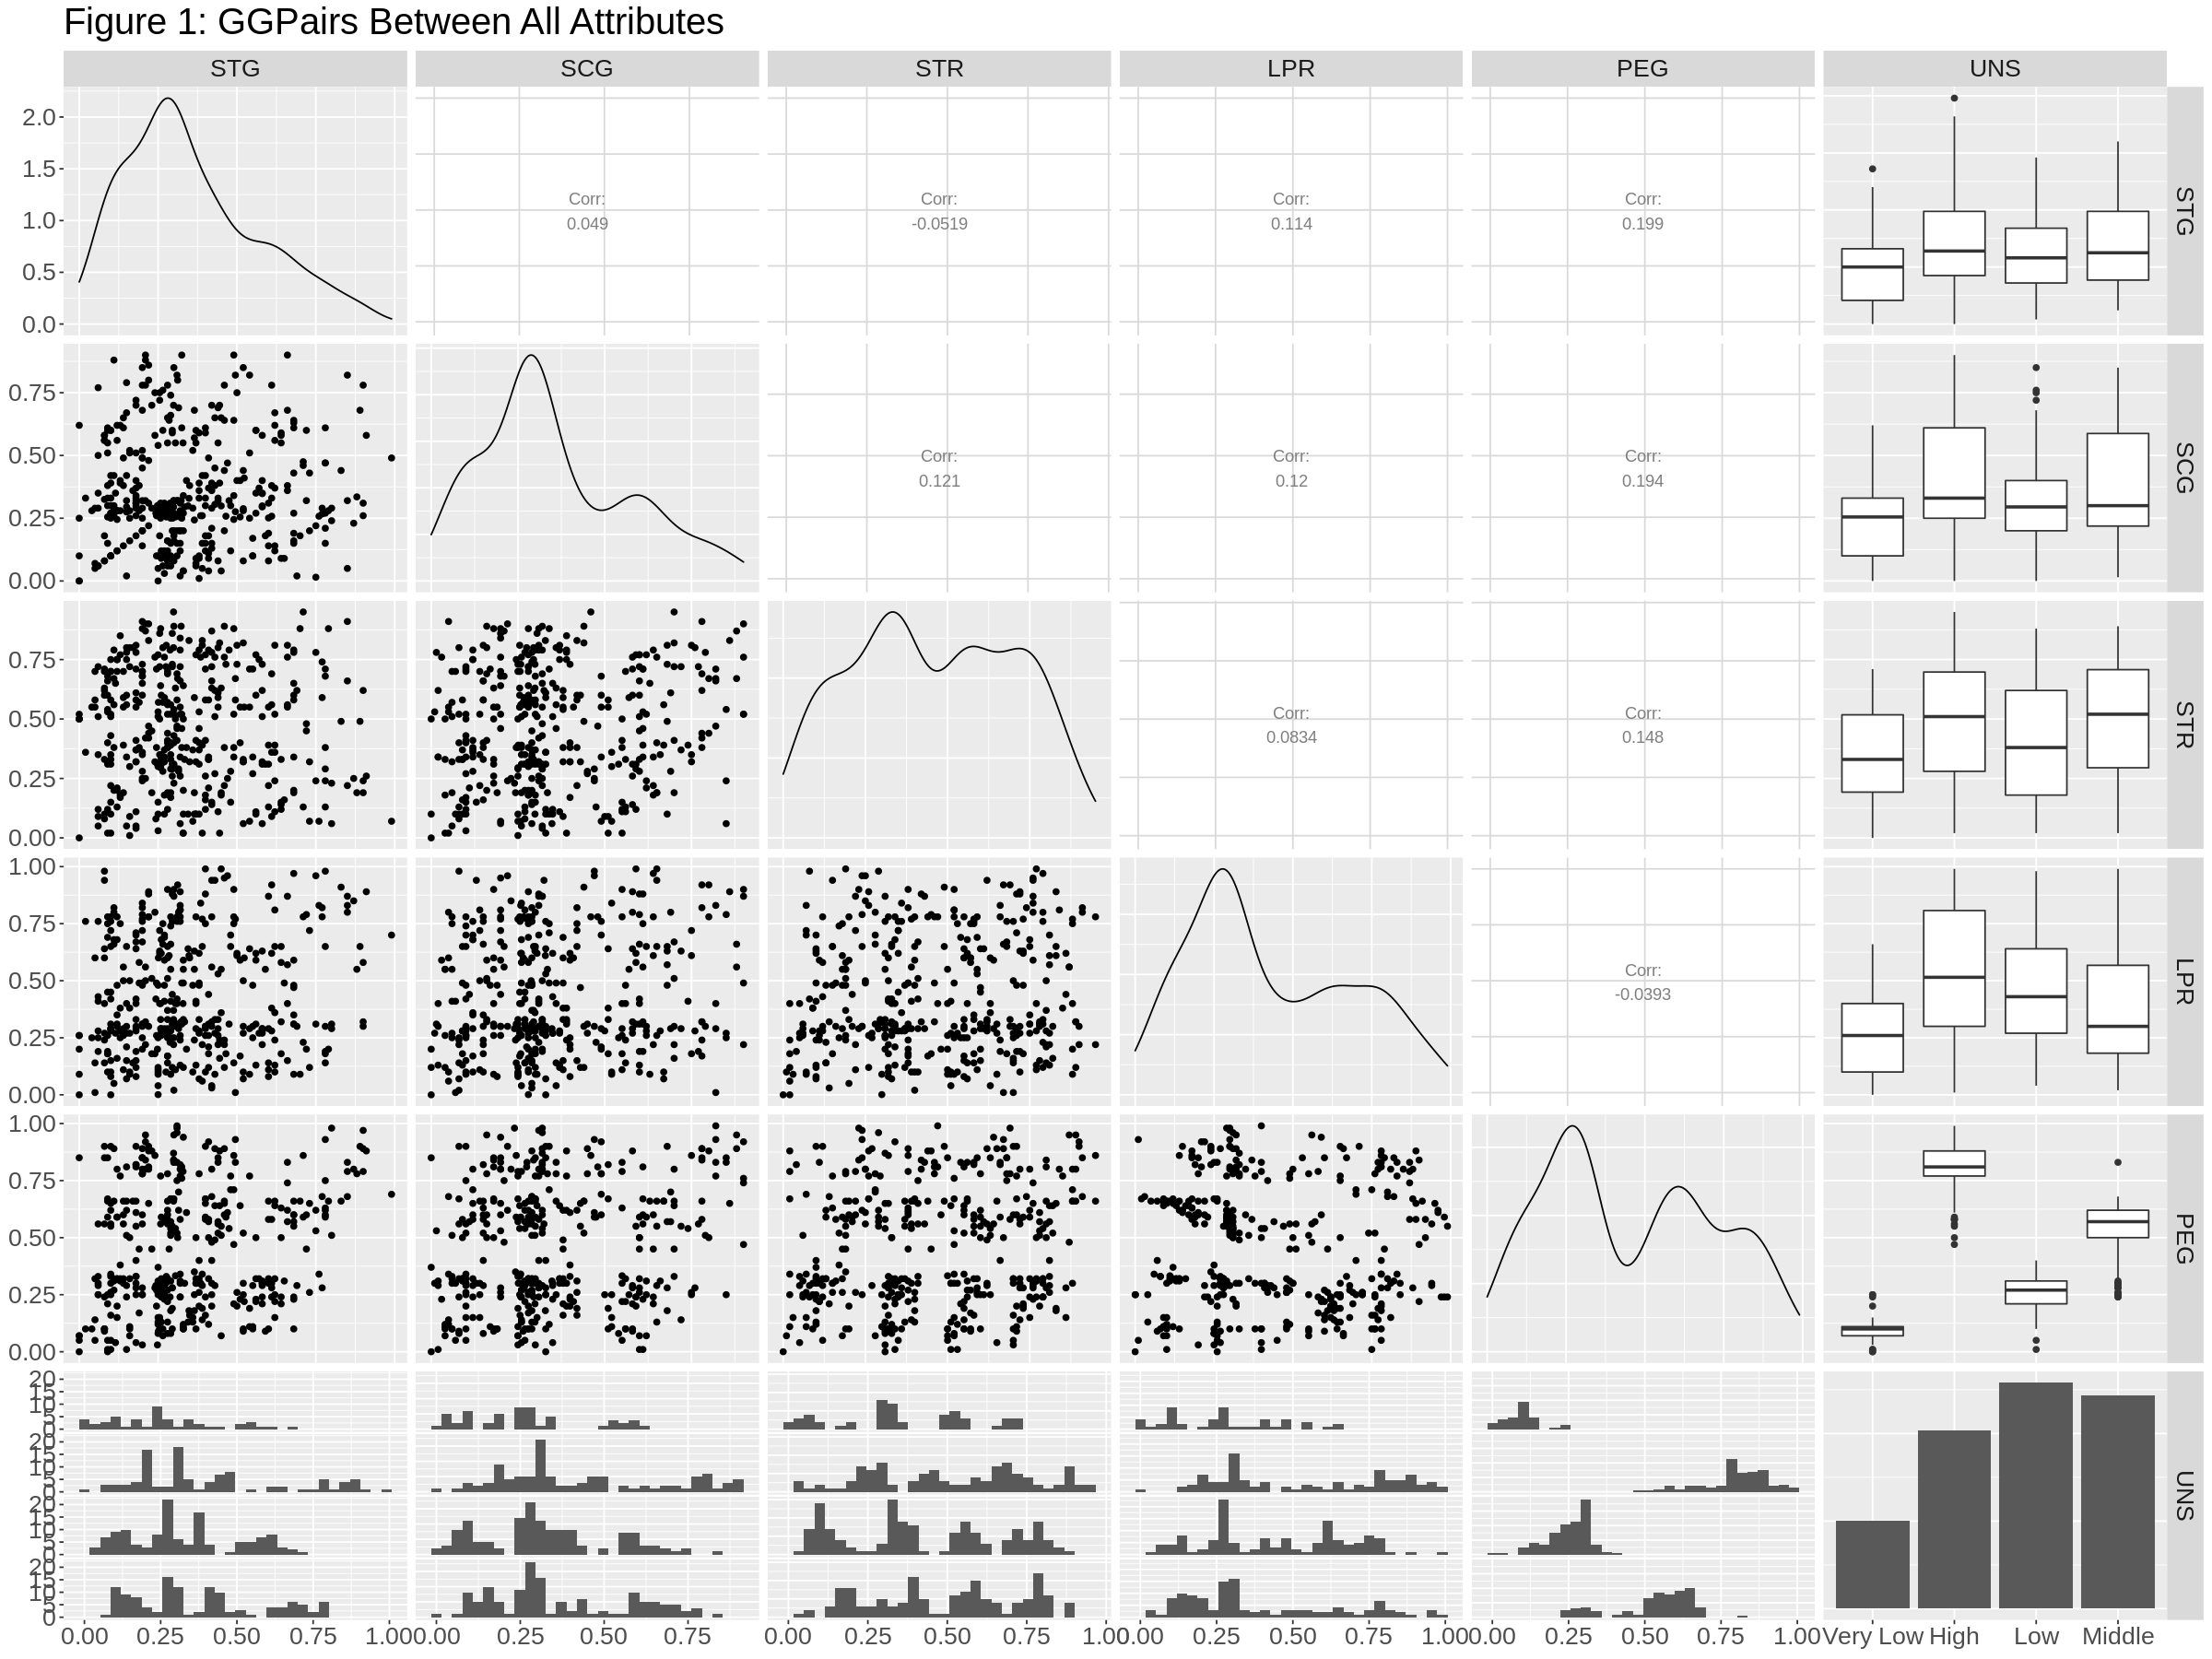

In [63]:
options(repr.plot.width = 20, repr.plot.height = 15) 
knowledge_plot_pairs <- user_knowledge_data_randomized %>%
                          ggpairs() + 
                          ggtitle ("Figure 1: GGPairs Between All Attributes") +
                          theme(text = element_text(size = 20))
knowledge_plot_pairs

In [64]:
#Discuss about why we did ggpairs and correlations 

<li> Data Analysis </li>

Utilizing the box plot medians and distributions, we will attempt to visually identify the attributes that would be useful as predictors due to distinctness in one or more knowledge categories. We will then attempt to refine our selection by looking at the distributions more in depth to identify areas of overlap and exclusivity. Next, we will run K-NN classification models using the selected predictors to evaluate their accuracy in classifying. Finally, we will visualize the correlation between the predictors using a ggpairs plot. 

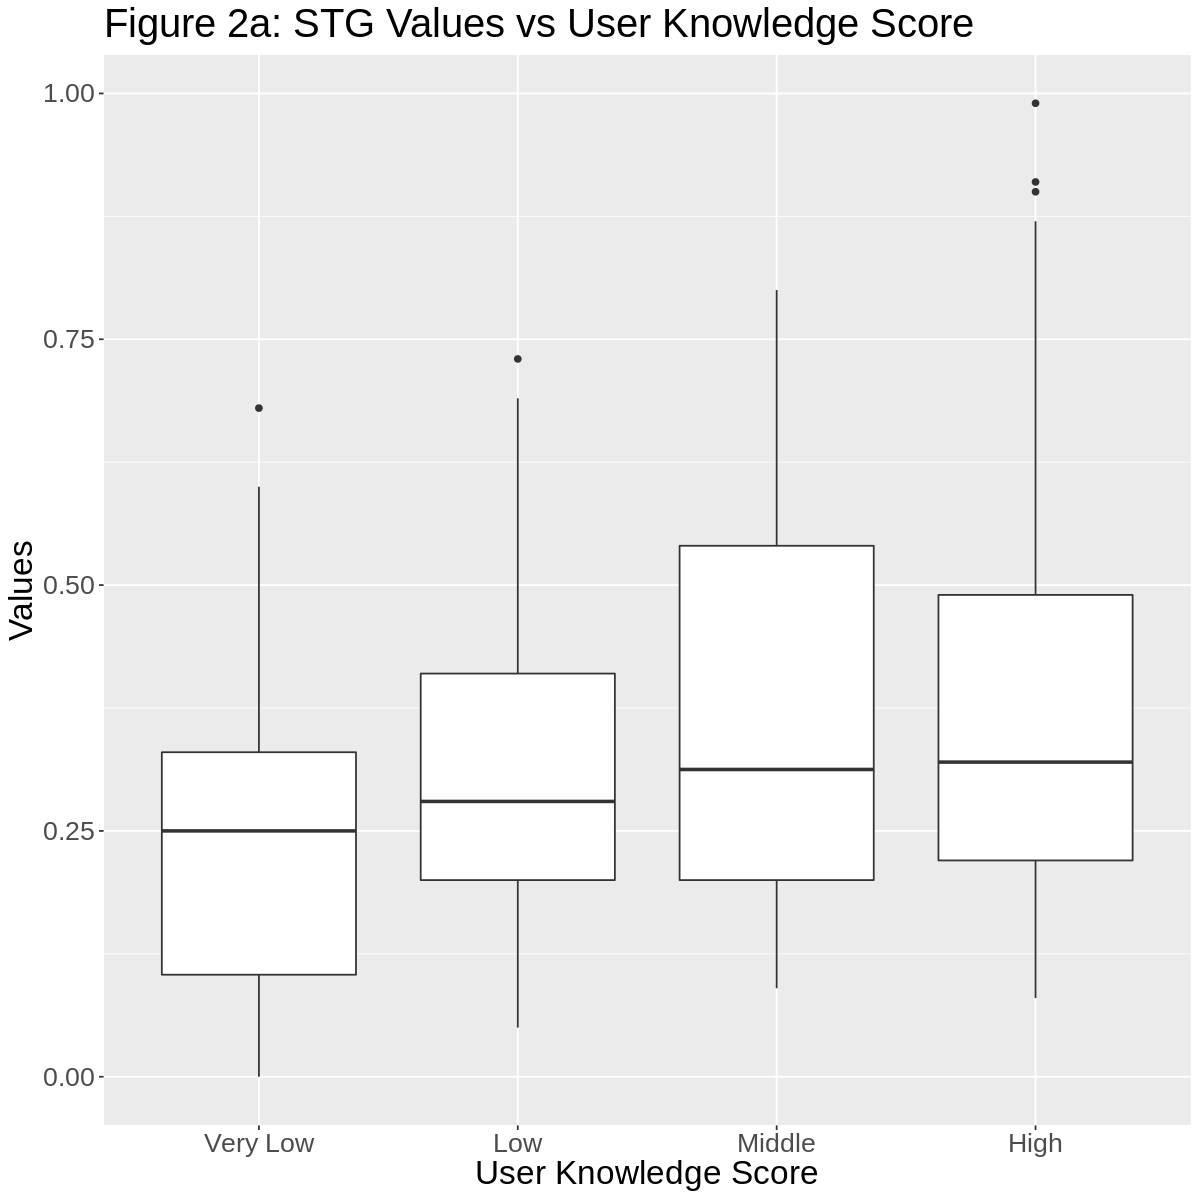

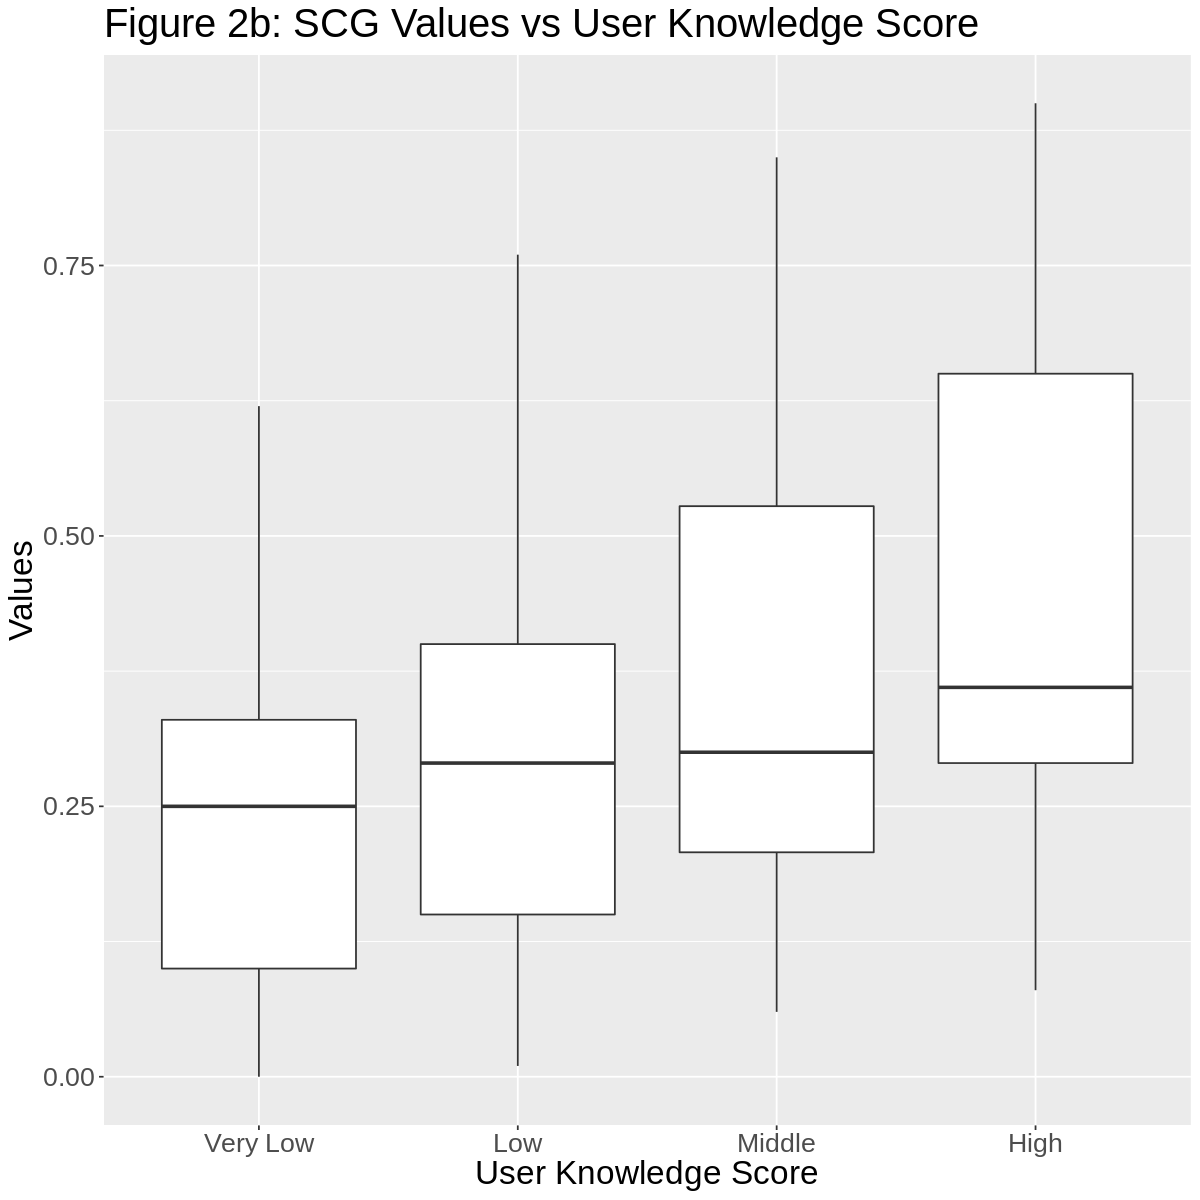

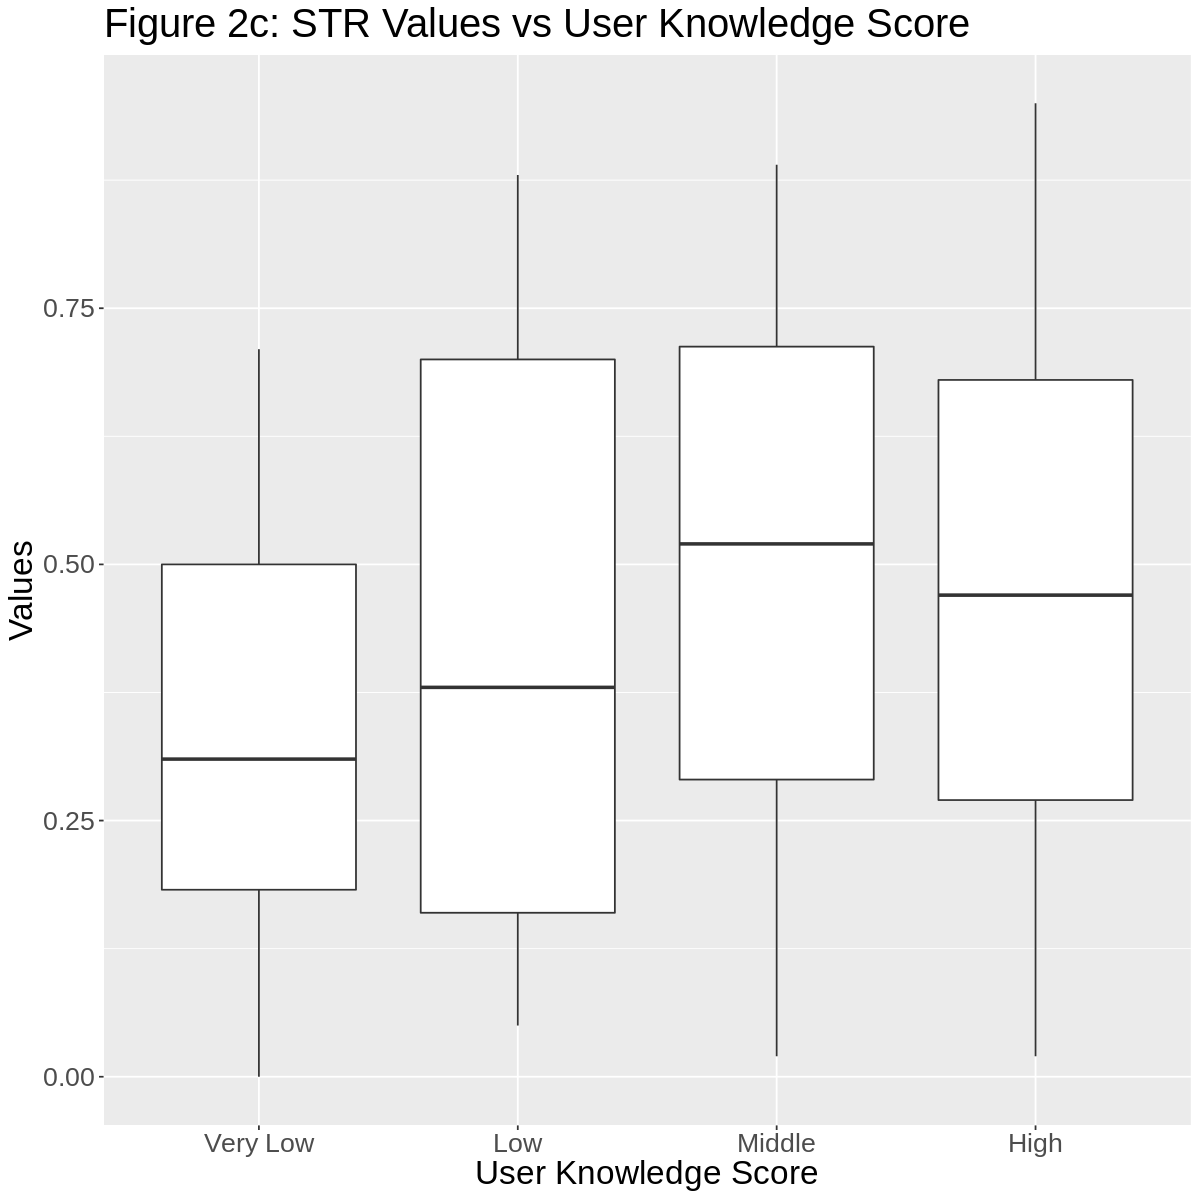

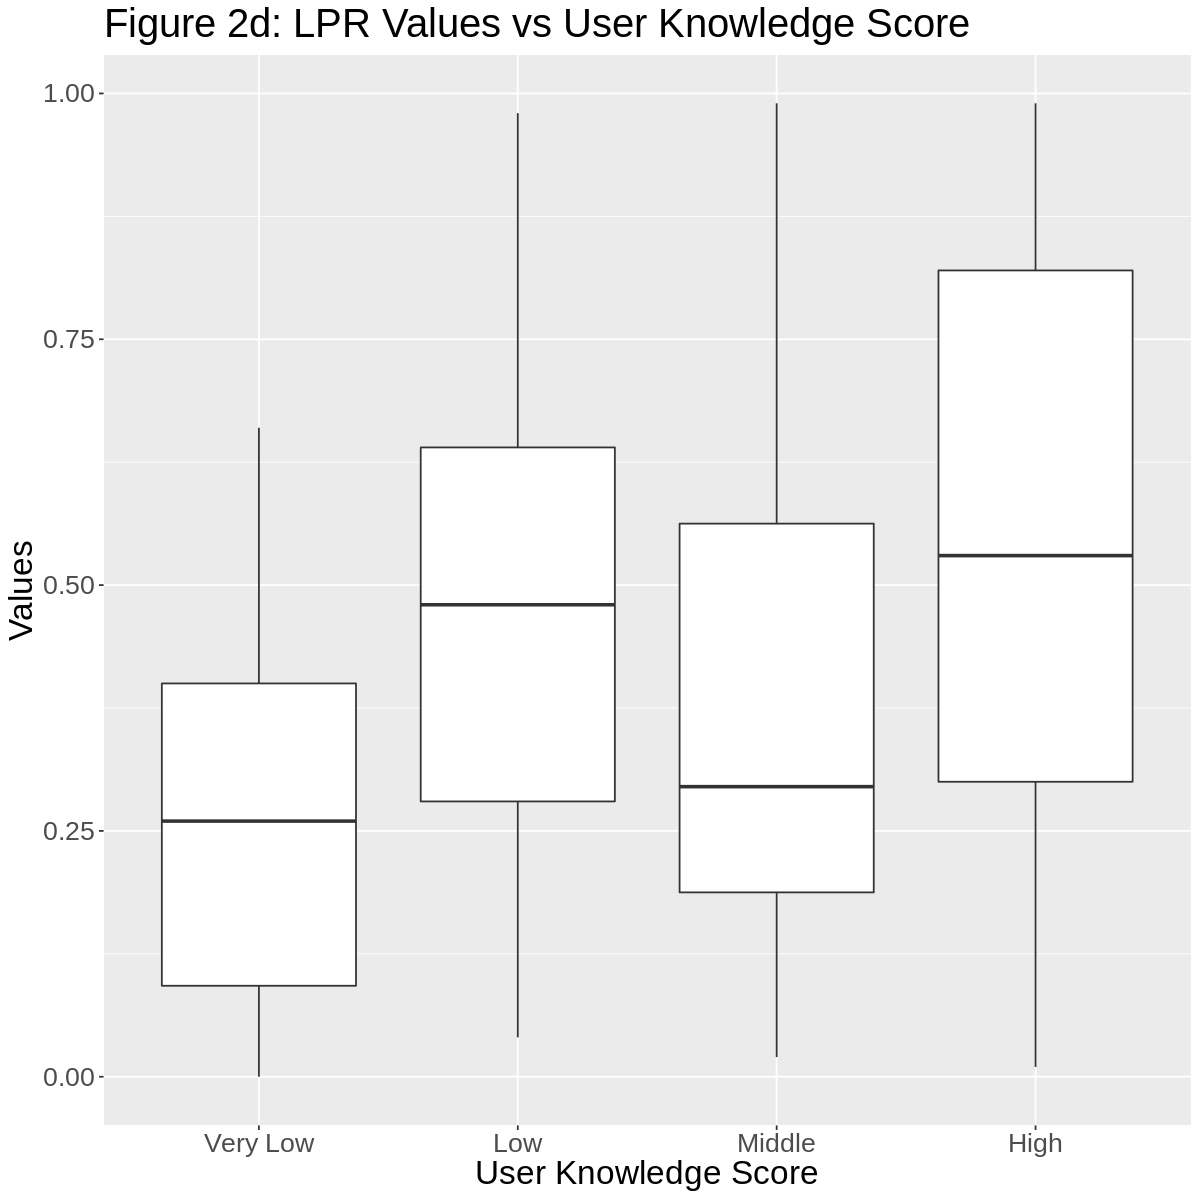

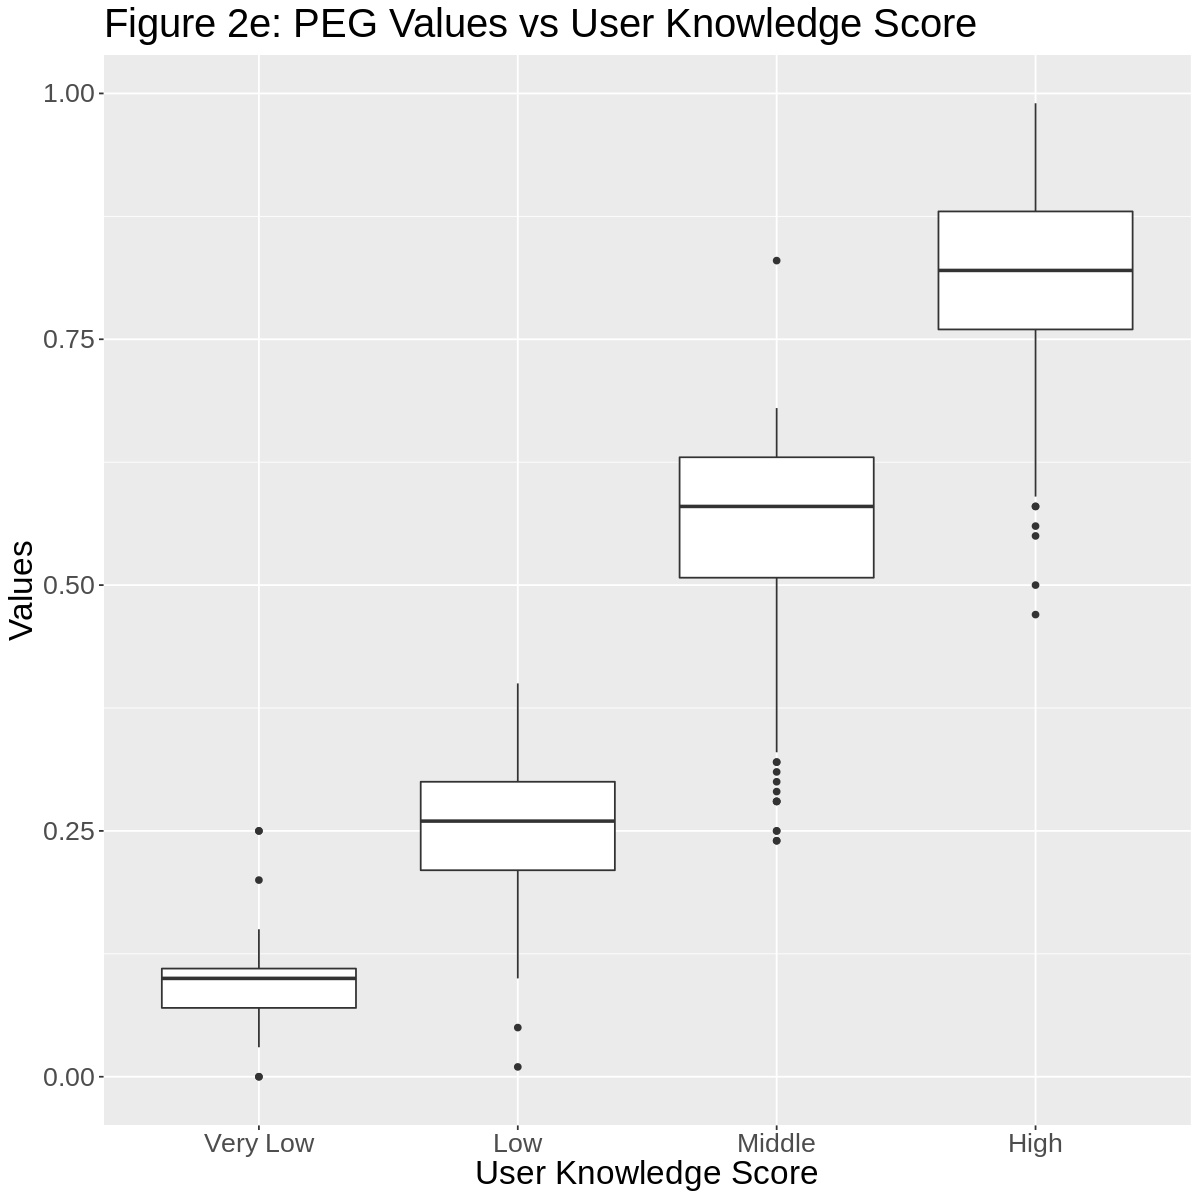

In [41]:
user_knowledge_data_STG <- knowledge_data_training %>%
select(STG, UNS)


user_knowledge_data_SCG <- knowledge_data_training %>%
select(SCG, UNS)


user_knowledge_data_STR <- knowledge_data_training %>%
select(STR, UNS)


user_knowledge_data_LPR <- knowledge_data_training %>%
select(LPR, UNS)


user_knowledge_data_PEG <- knowledge_data_training %>%
select(PEG, UNS)

options(repr.plot.height = 10, repr.plot.width = 10)

user_knowledge_data_STG$UNS <- factor(user_knowledge_data_STG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STG_box_plot <- ggplot(user_knowledge_data_STG, aes(x = UNS, y = STG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2a: STG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STG_box_plot

user_knowledge_data_SCG$UNS <- factor(user_knowledge_data_SCG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
SCG_box_plot <- ggplot(user_knowledge_data_SCG, aes(x = UNS, y = SCG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2b: SCG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
SCG_box_plot

user_knowledge_data_STR$UNS <- factor(user_knowledge_data_STR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
STR_box_plot <- ggplot(user_knowledge_data_STR, aes(x = UNS, y = STR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2c: STR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
STR_box_plot

user_knowledge_data_LPR$UNS <- factor(user_knowledge_data_LPR$UNS, levels = c("Very Low", "Low", "Middle", "High"))
LPR_box_plot <- ggplot(user_knowledge_data_LPR, aes(x = UNS, y = LPR)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2d: LPR Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
LPR_box_plot

user_knowledge_data_PEG$UNS <- factor(user_knowledge_data_PEG$UNS, levels = c("Very Low", "Low", "Middle", "High"))
PEG_box_plot <- ggplot(user_knowledge_data_PEG, aes(x = UNS, y = PEG)) + 
                          geom_boxplot() +
                          labs(x = "User Knowledge Score", y = "Values", title= "Figure 2e: PEG Values vs User Knowledge Score") + 
                          theme(text = element_text(size = 20))
PEG_box_plot


From our boxplots, we can see the following trends in each of the predictors:
- STG: The medians for all 4 user knowledge categories are very similar, the distributions have significant overlap. This makes it difficult to distinguish between categories and thus would make not be a good predictor in our model. 
- SCG: Although the medians are very similar, the distributions have more variance and appear to have less overlap. There also seems to be monotonic increase from "Very Low" to "High" user knowledge scores, thus at this stage we may consider using this predictor in our model.  
- STR: Although the medians appear to have some variance, the distributions have significant overlap across all four UNS categories, thus rendering it unsuitable for use in classification.
- LPR: The median appears to "zig-zag" as it increases across the UNS categories, this is also reflected in the distributions. Thus we are able to distinguish certain categories such as "Very Low" to "Low" and "Medium" to "High". Thus rendering this as a good predictor for our model. 
- PEG: There is obvious and significant differentiation between the four categories, both in terms of the median and overall distribution. This makes for a very good predictor in our model. 

In [67]:
#check with Cathy if we need box plot or not 

Picking joint bandwidth of 0.0709

Picking joint bandwidth of 0.0762



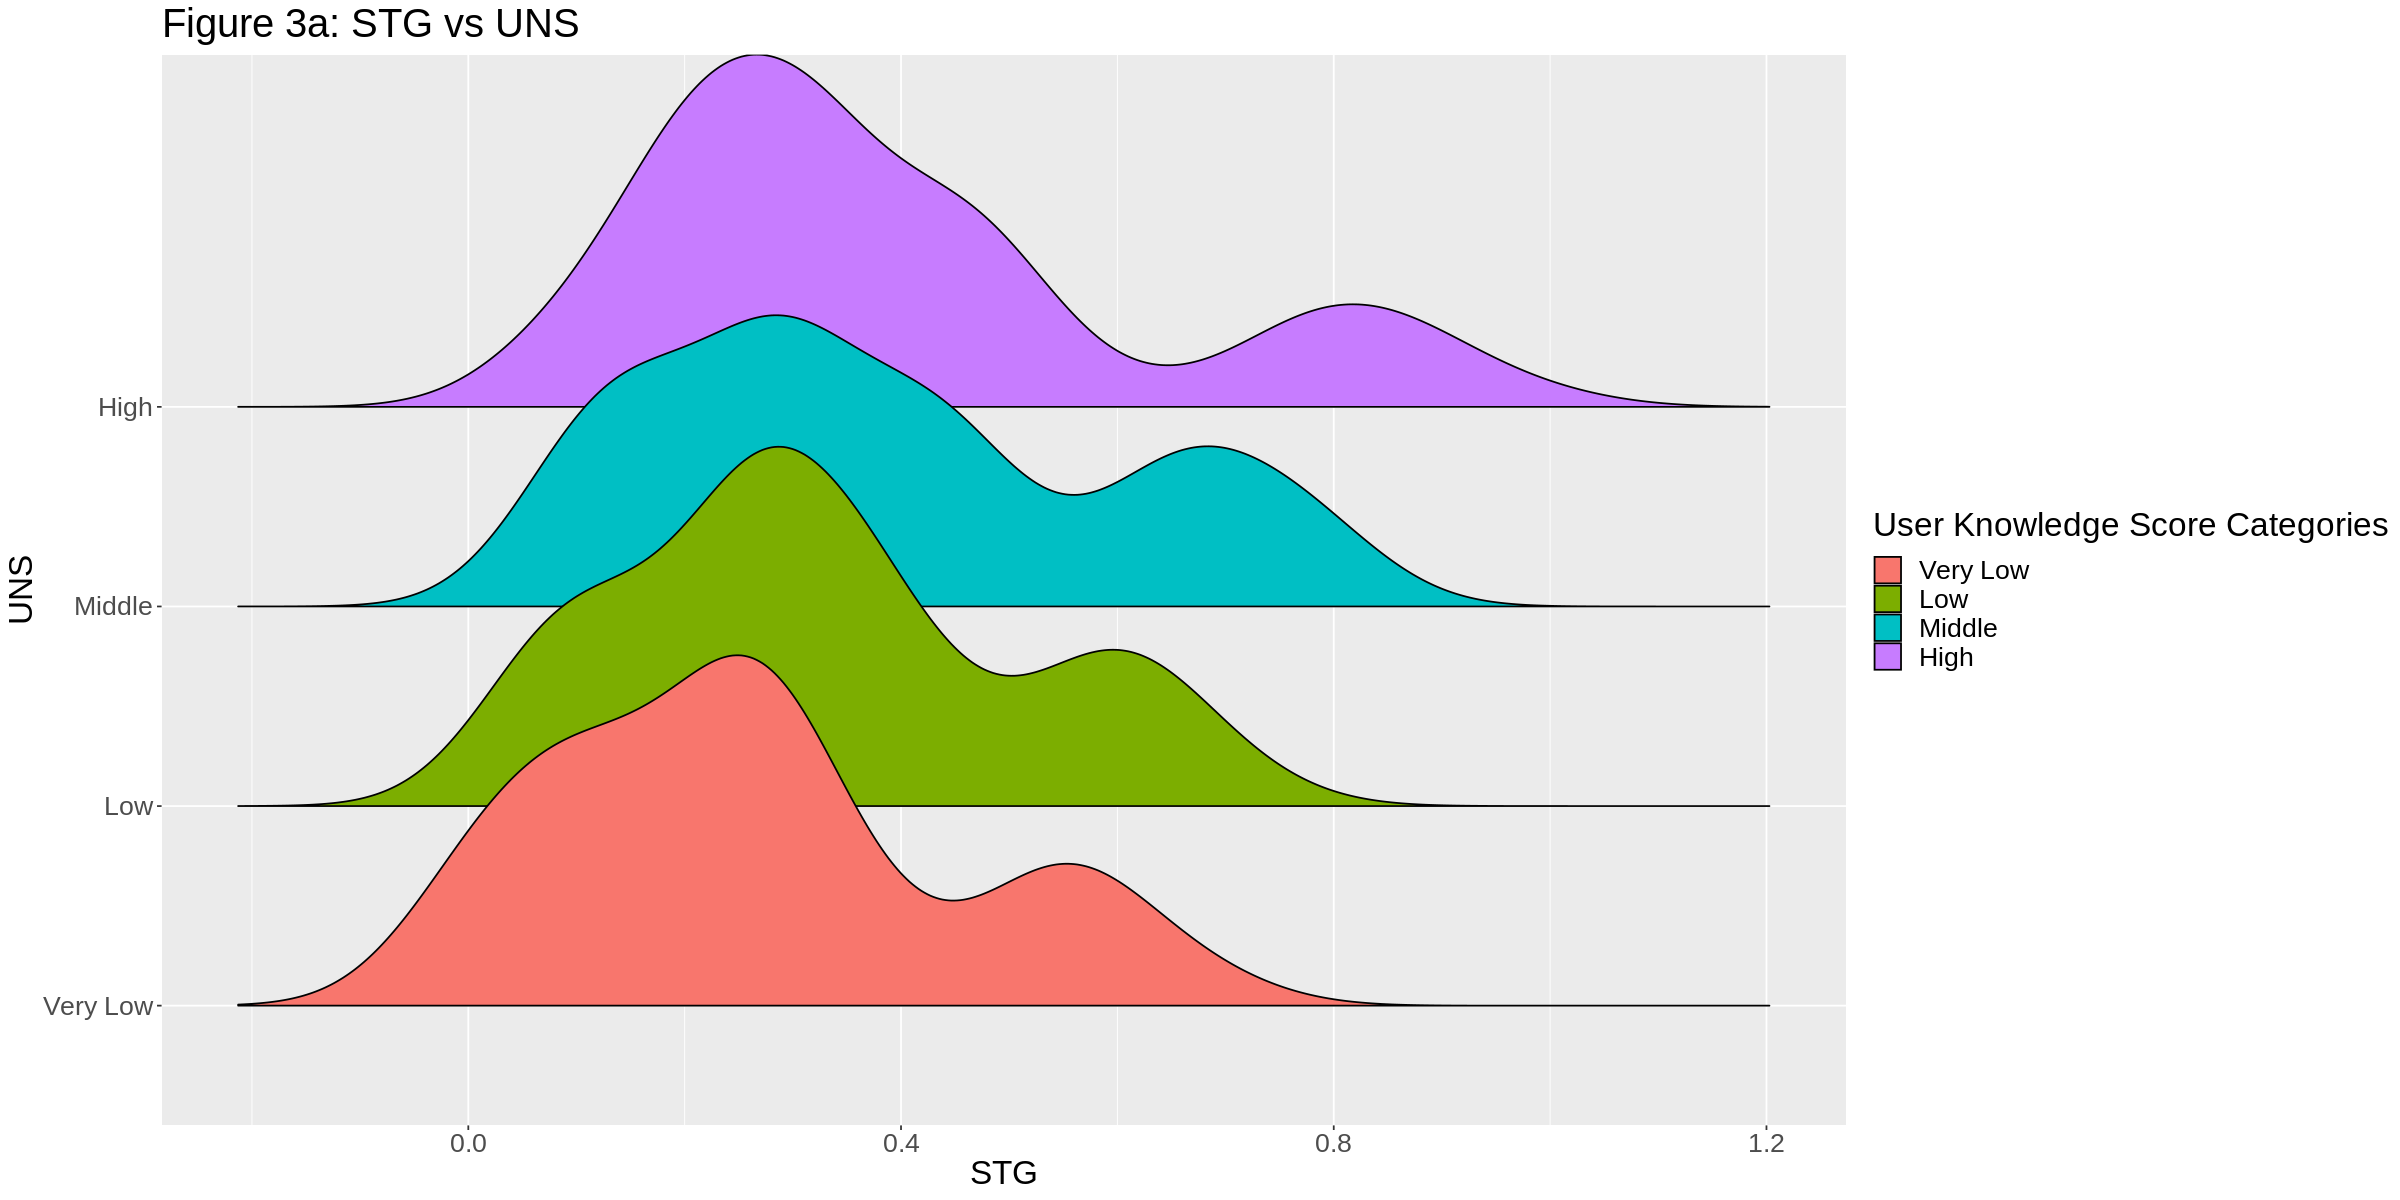

Picking joint bandwidth of 0.0923



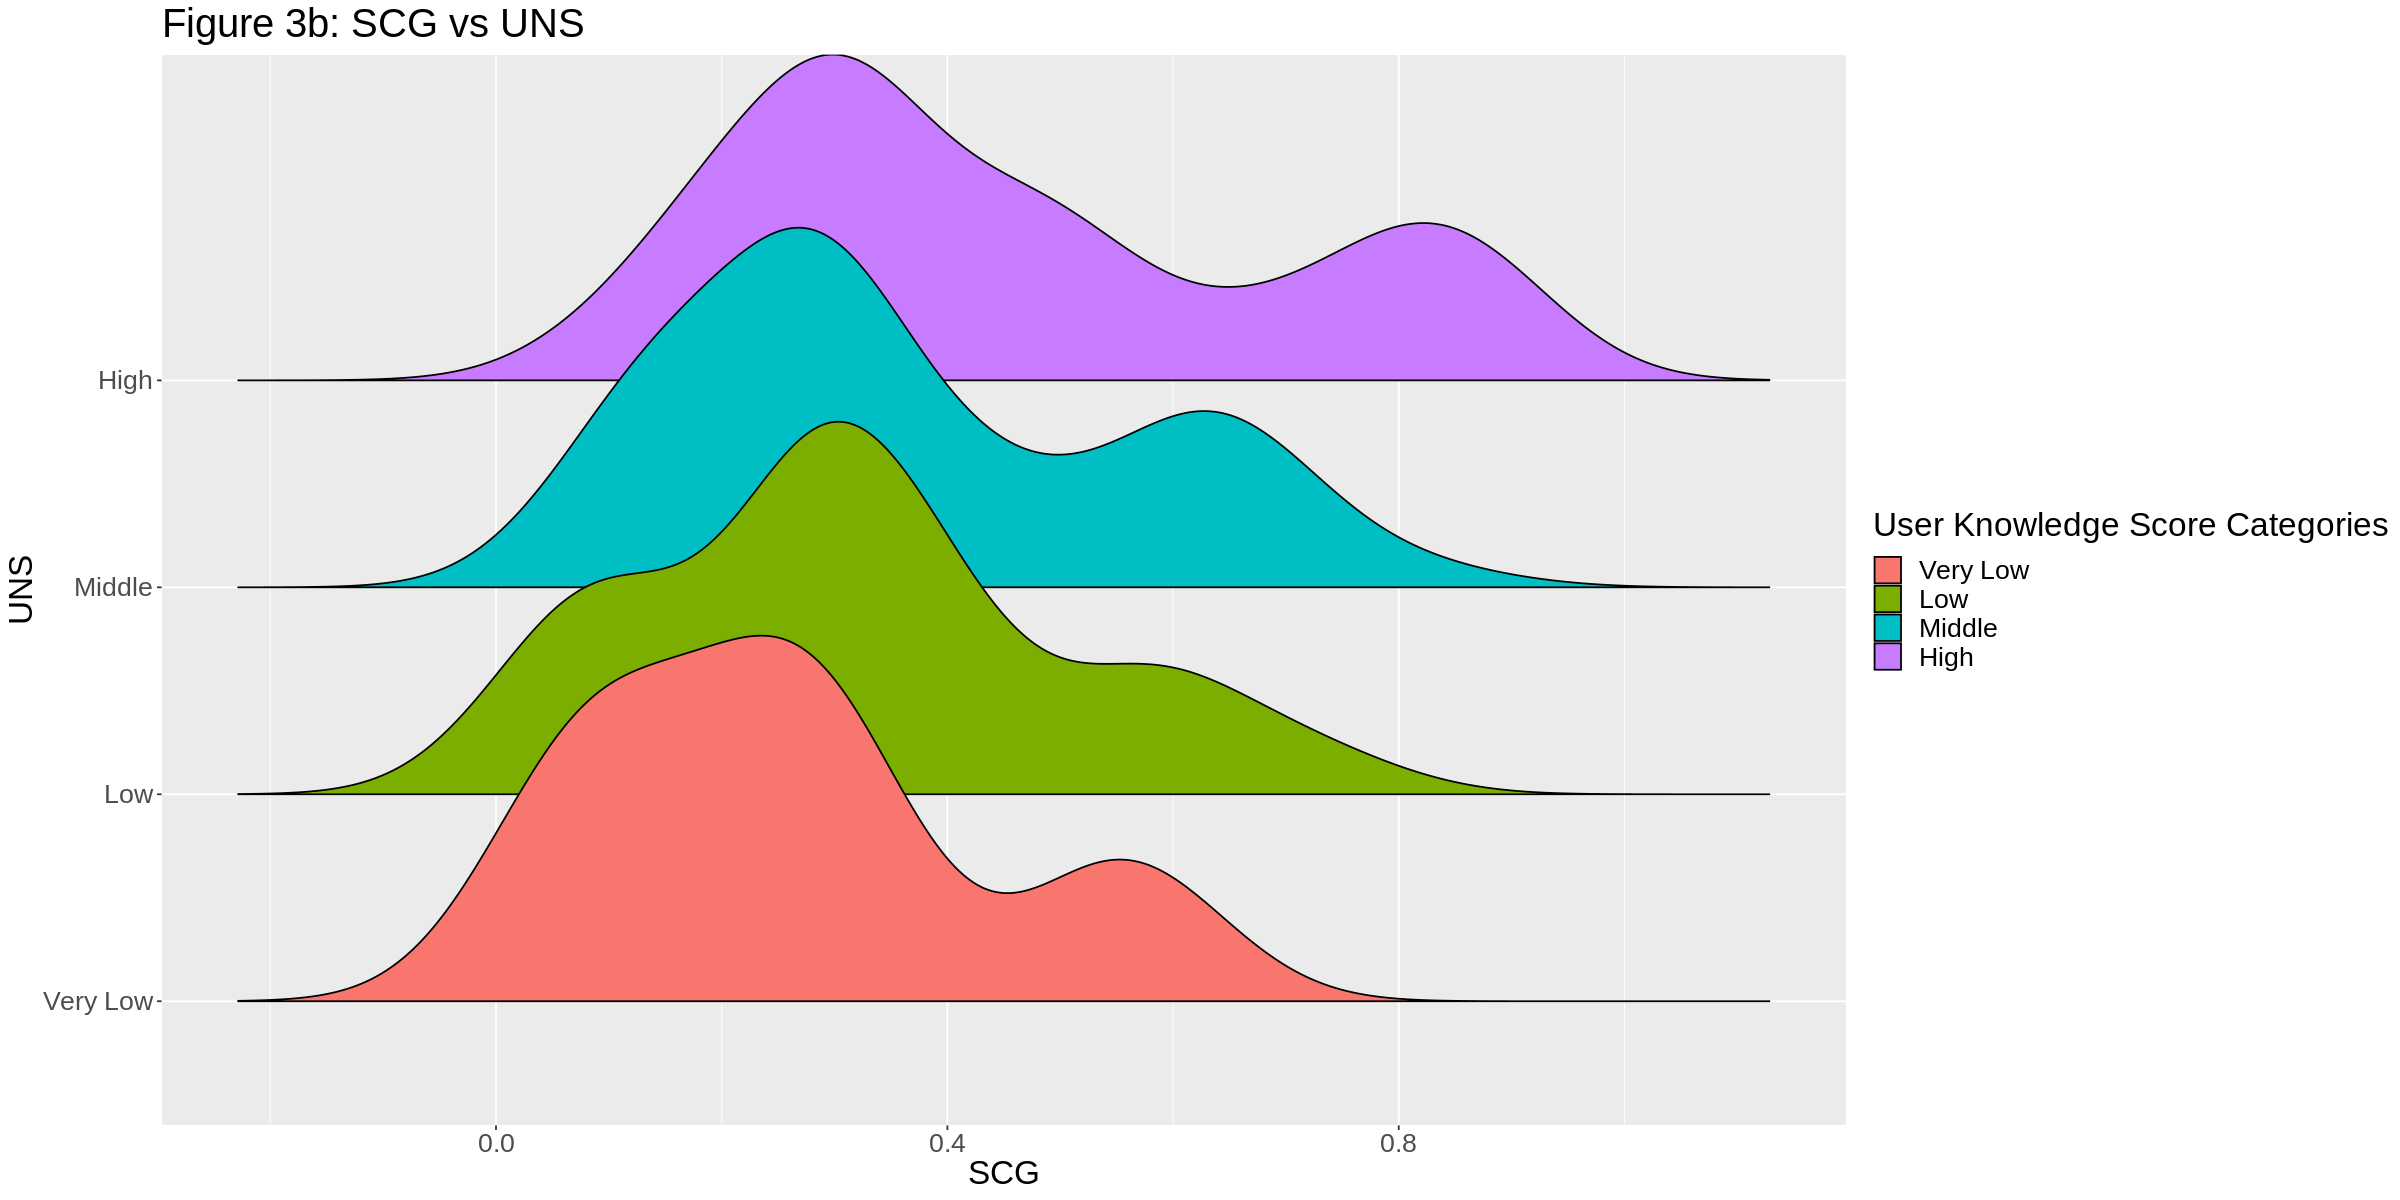

Picking joint bandwidth of 0.0916



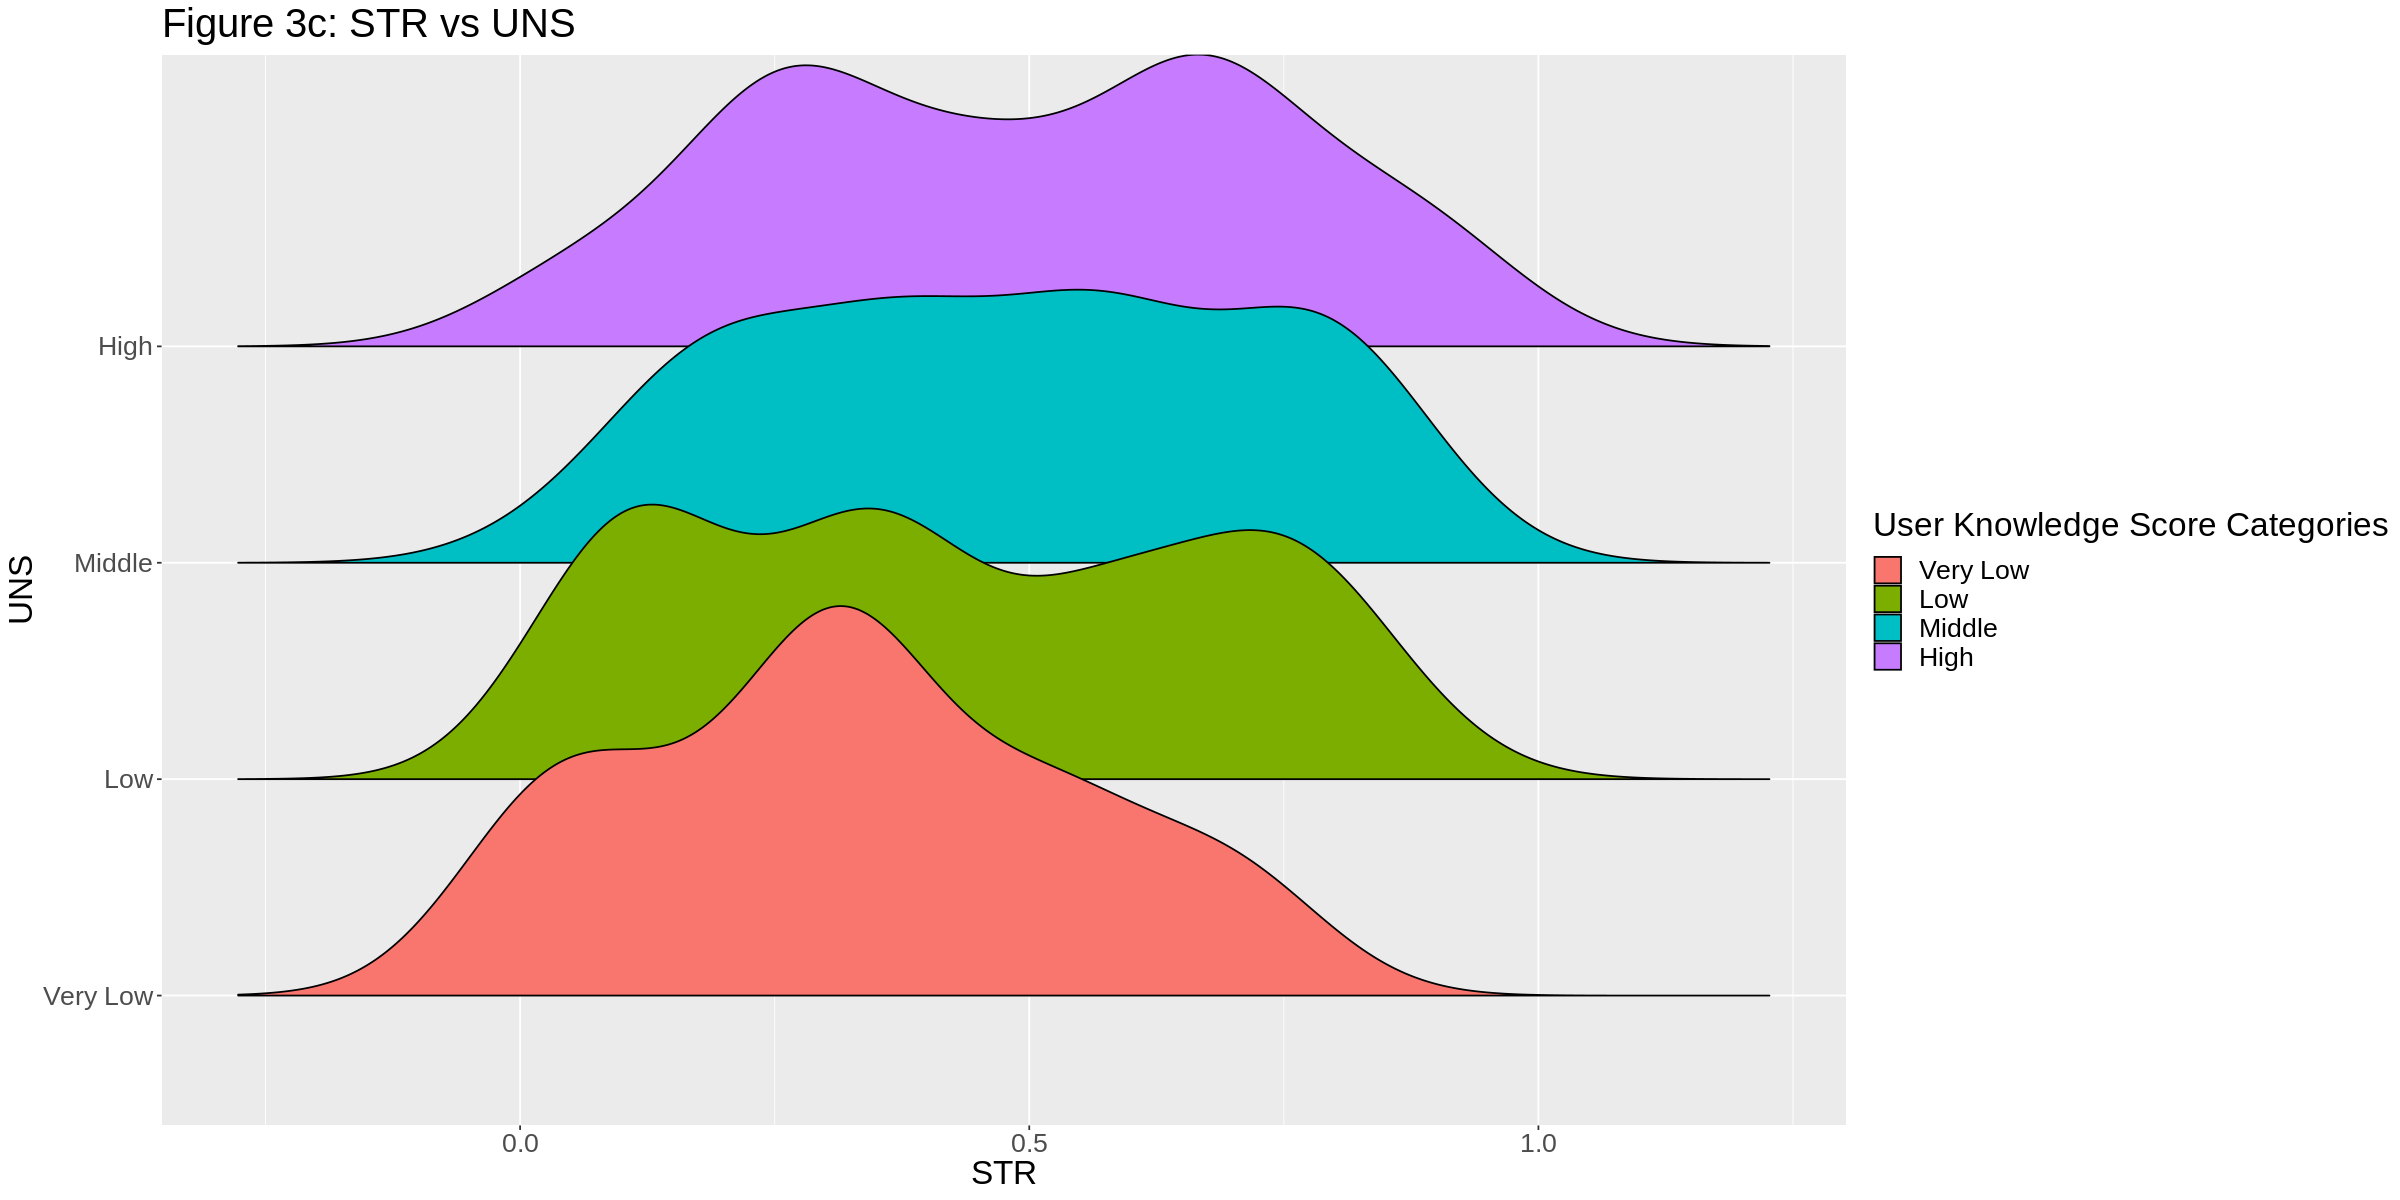

Picking joint bandwidth of 0.0261



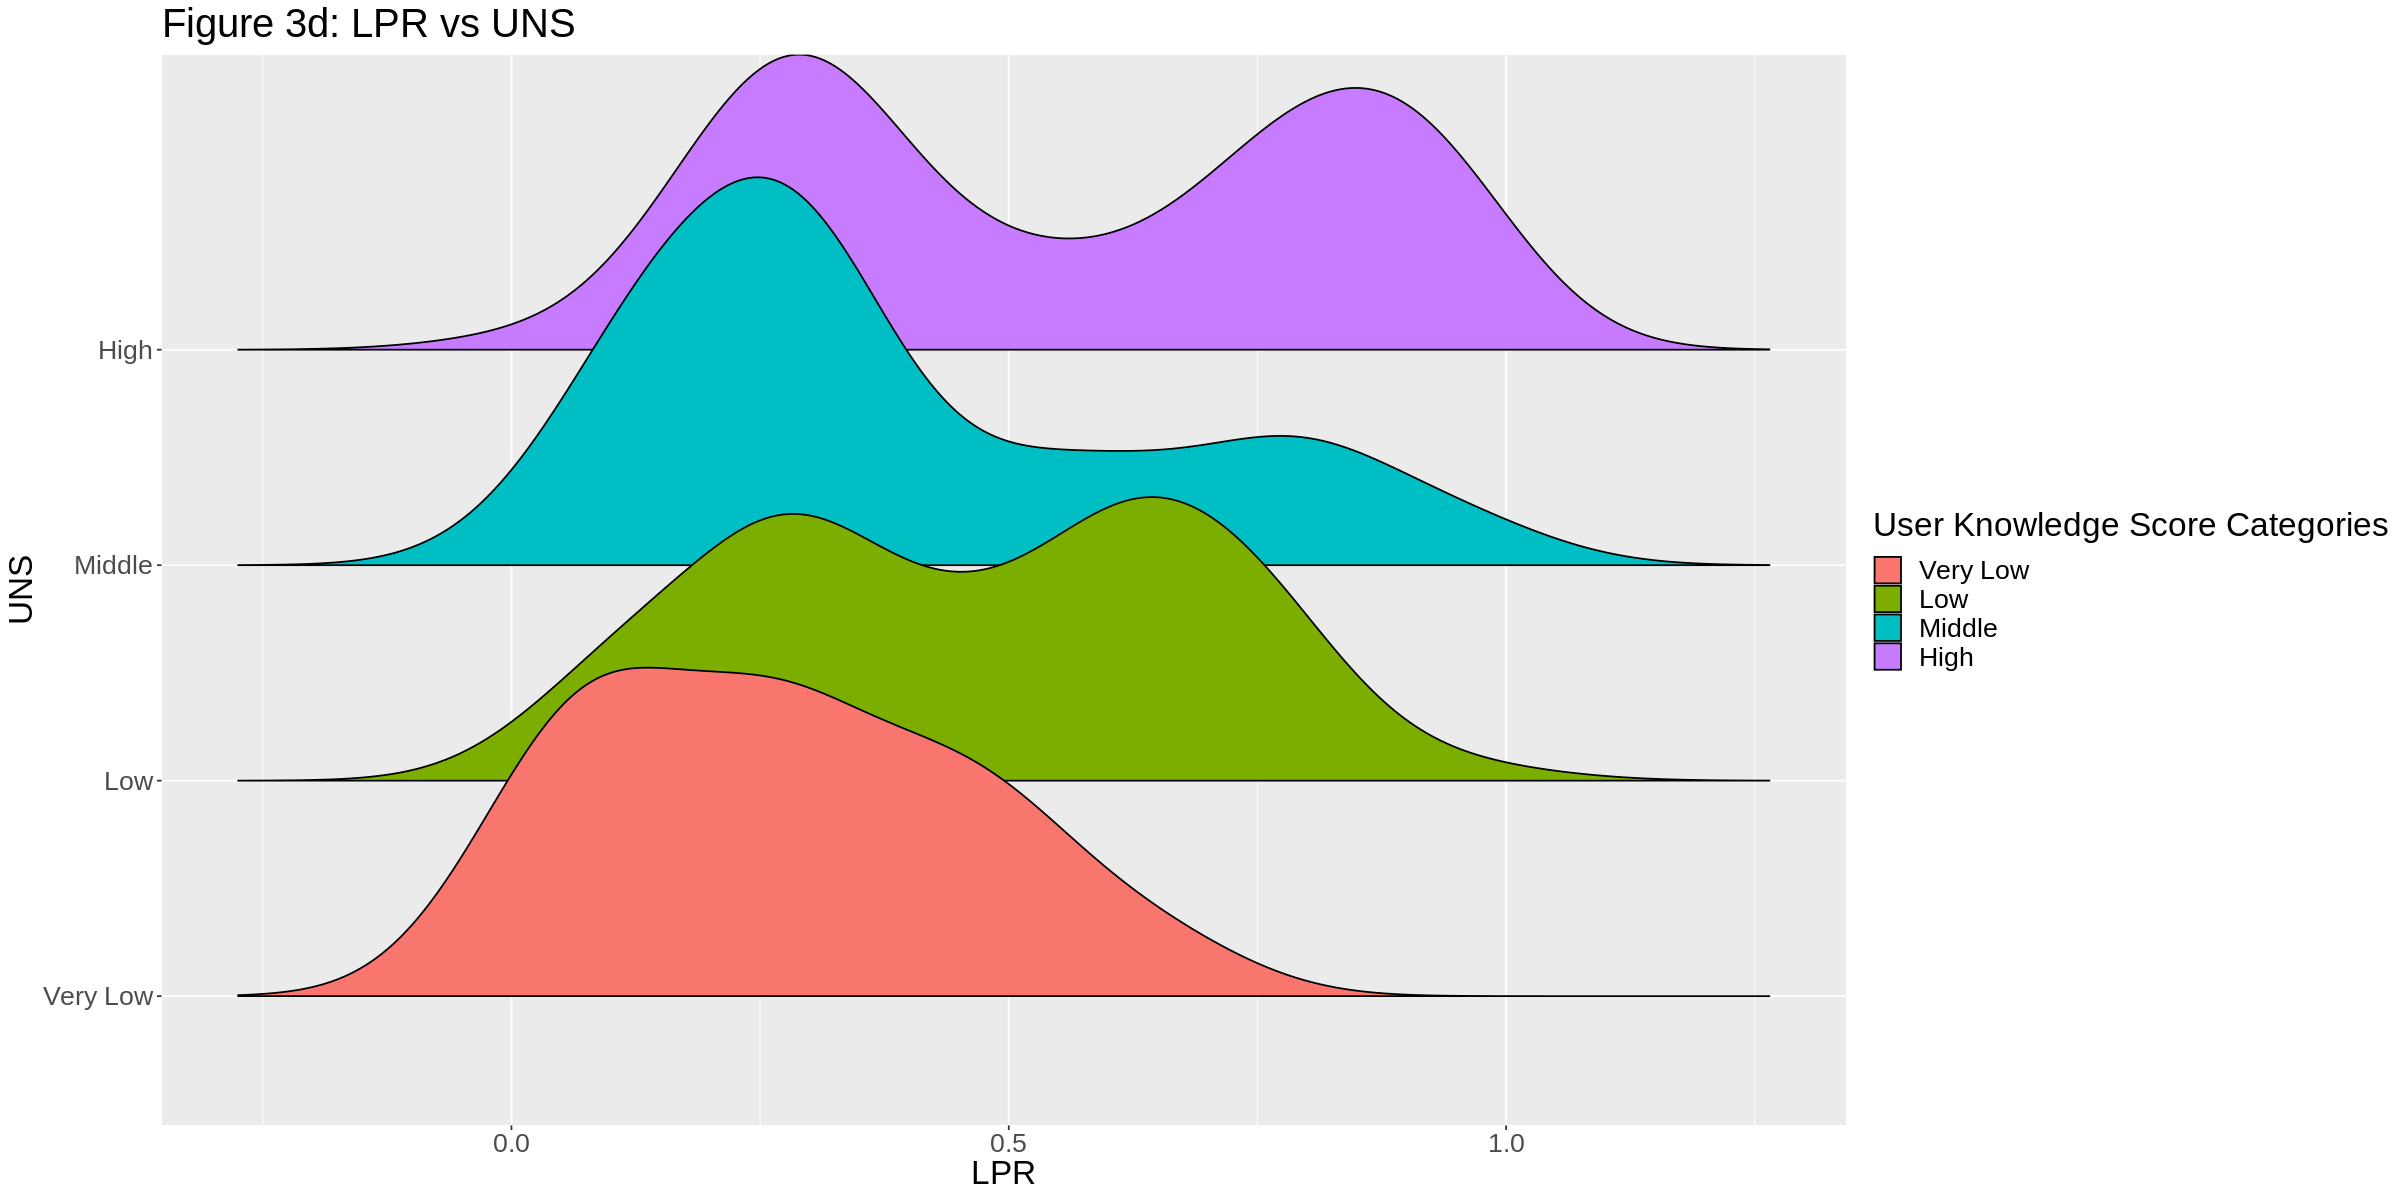

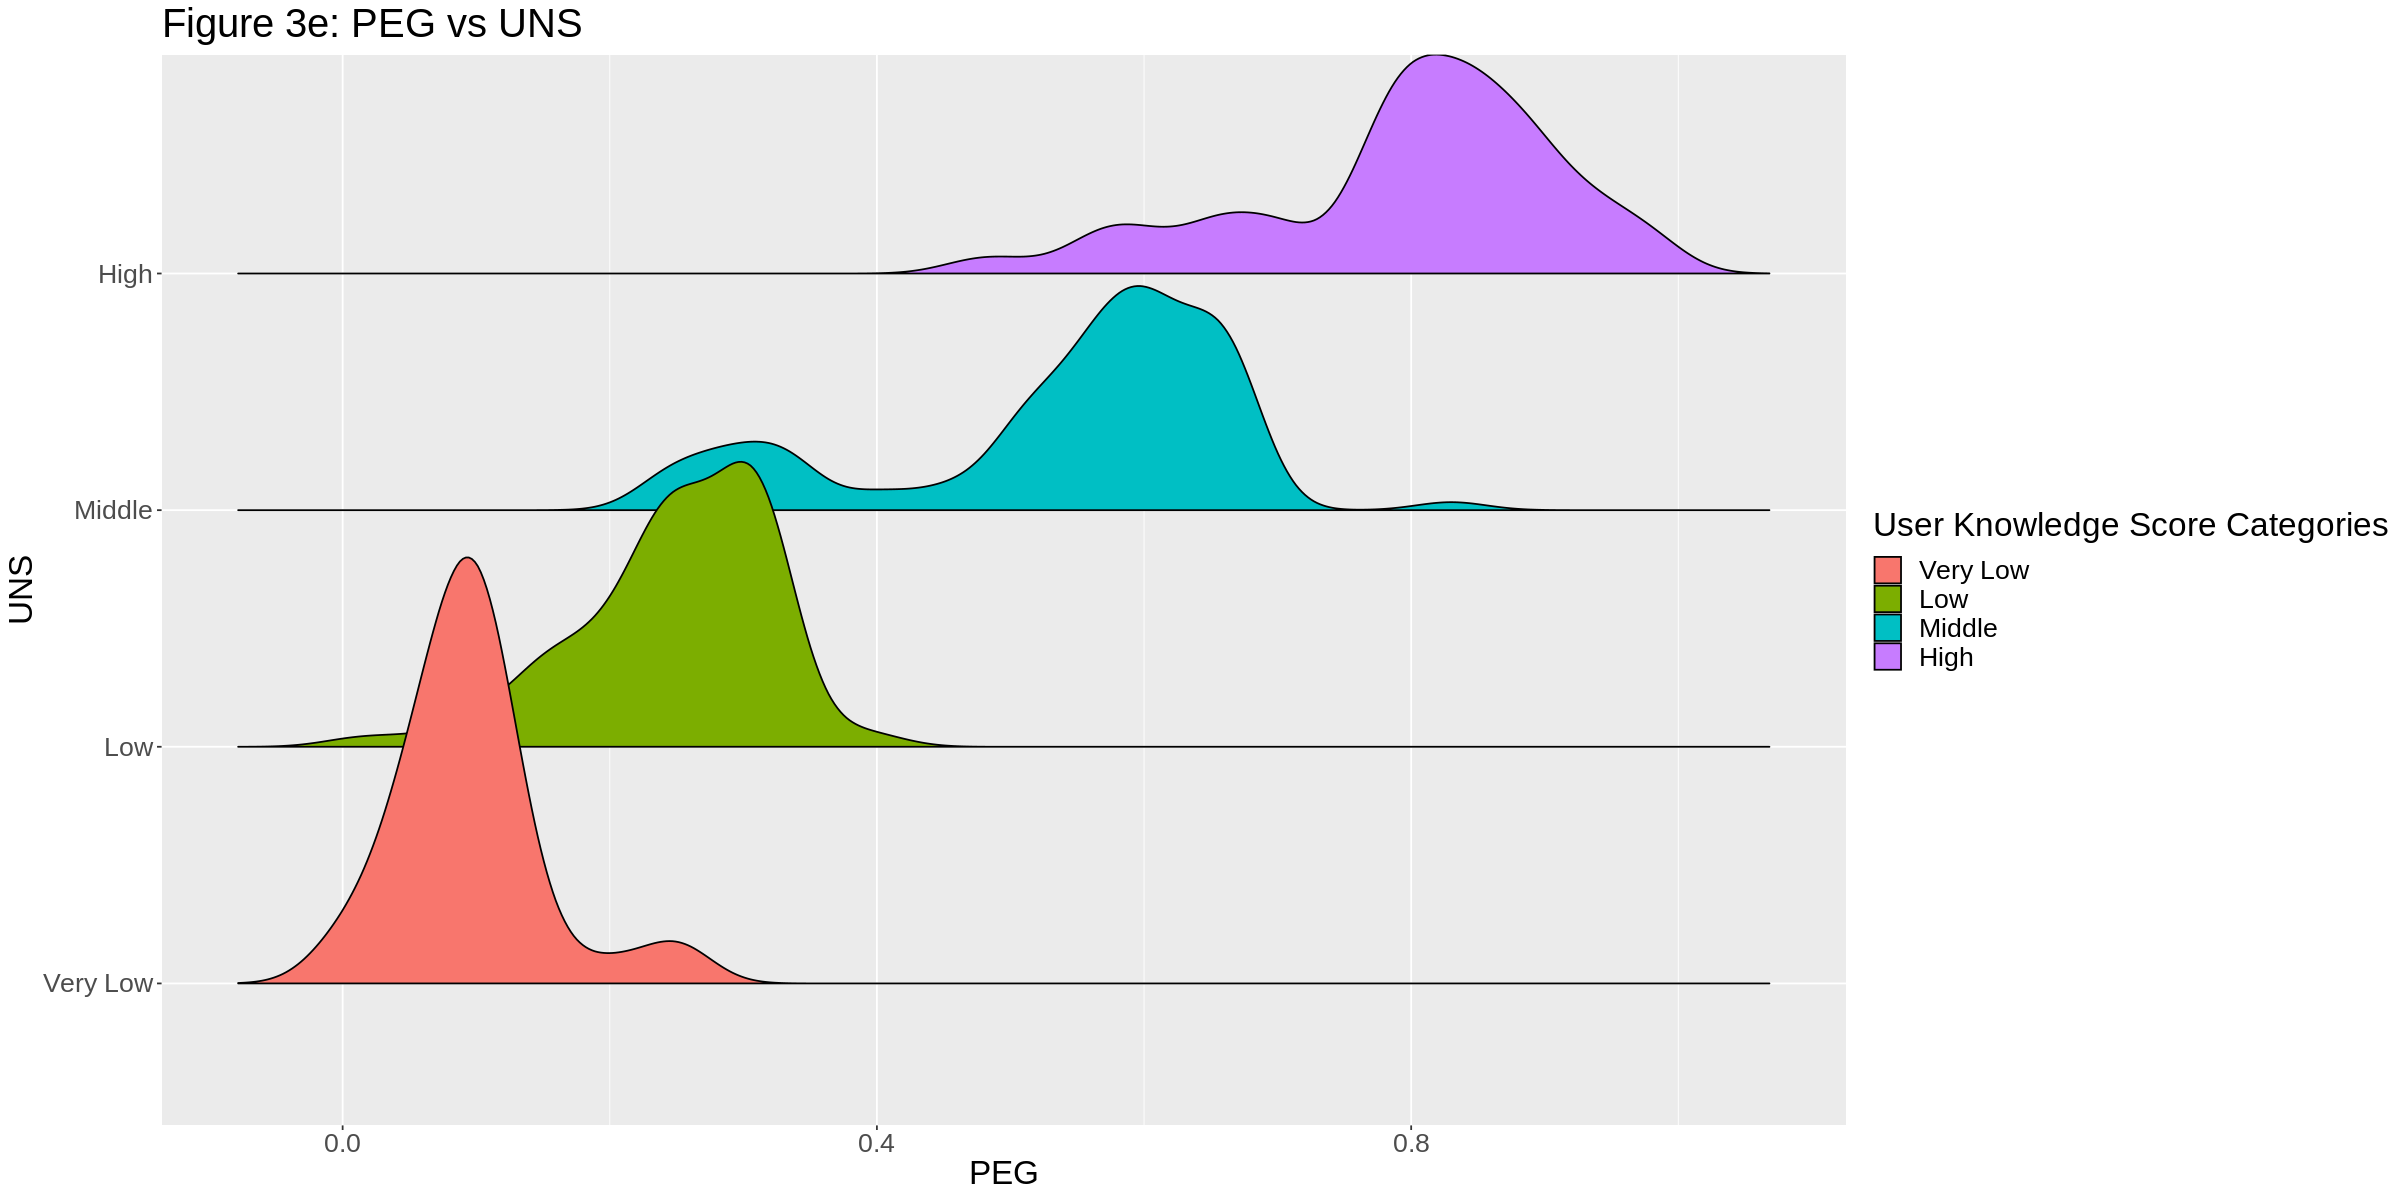

In [43]:
options(repr.plot.height = 10, repr.plot.width = 20)

ggplot(user_knowledge_data_STG, aes(x = STG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3a: STG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_SCG, aes(x = SCG, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3b: SCG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_STR, aes(x = STR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3c: STR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_LPR, aes(x = LPR, y = UNS, fill = UNS)) + 
    geom_density_ridges2() +
    labs(title = "Figure 3d: LPR vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))

ggplot(user_knowledge_data_PEG, aes(x = PEG, y = UNS, fill = UNS)) +
    geom_density_ridges2() +
    labs(title = "Figure 3e: PEG vs UNS", fill = "User Knowledge Score Categories") +
    theme(text = element_text(size = 20))



From our ridgeplots, we can see the following trends in each of the predictors:
- STG: We can see a rough bimodal distribution for all four UNS categories that overlap significantly, thus our initial assessment based on the boxplots of this not being a good predictor is confirmed. 
- SCG: Contrary to our assessment from the boxplots, we can see in the ggridge that this variable no longer appears to be a good predictor as it very closely resembles a similar distribution as our STG variable, thus we will not include it in our model.  
- STR: Confirmming our initial assessment, all four knowledge score distirbutions can be seen to have significant overlap in a unimodal fashion. Thus, we can exclude this predictor completely from our model.
- LPR: There appears to be irregularity in the distributions such that we are able to distinguish between certain categories such as "Very Low" to "Low" and "Medium" to "High" based on the varying probability densities under certain values. Thus confirming our initial assessment and can include this variable in our predictive model. 
- PEG: From the ggridge, we can see slight overlap in the distributions; however, there is still significant deliniation between the four categories. This confirming our intial assessment with the boxplots and making for a very good predictor in our model. 

From the plots, we are able to select 2 predictors, PEG and LPR. However, PEG has a significant difference in the distribution for each knowledge category and we would like to confirm that it is not single handedly responsible for any observed classification accuracy. Thus, we will formulate and run 2 classification models: one utilizing only PEG, the other utilizing both PEG and LPR to evaluate the respective contributions of each predictor to the observed accuracies. 

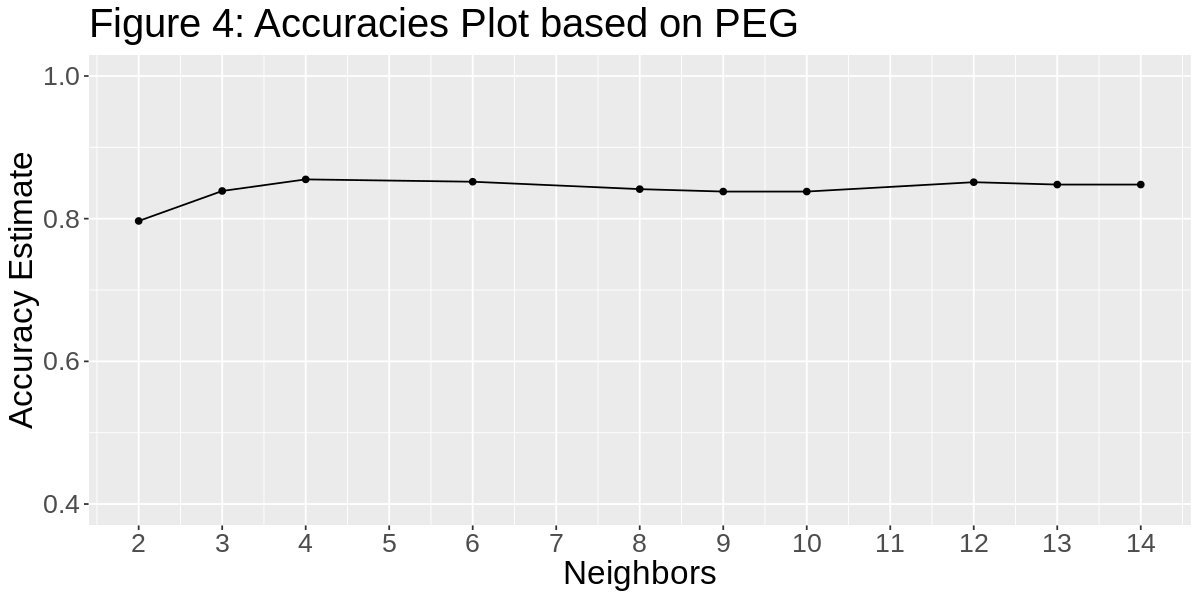

In [46]:
set.seed(2000)

peg_knowledge_recipe <- recipe(UNS ~ PEG, data = knowledge_data_training)

peg_knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

peg_knowledge_results <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_tune) %>%
       tune_grid(resamples = peg_knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

peg_accuracies <- peg_knowledge_results %>% 
       filter(.metric == "accuracy")

peg_accuracies_plot <- ggplot(peg_accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 4: Accuracies Plot based on PEG ") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 

peg_accuracies_plot

From this accuracy plot, only using one variable (PEG), we can see that the optimized k (neighbor) = 3 at roughly 85% accuracy. Although it appears that k=4 gives the high accuracy estimate, we did not choose k=4 to avoid an even split between the neighboring labels. 

In [ ]:
#try make k values from 1-100 and multiple of 10 for the k values (10, 20, 30, 40, .., 100)

In [70]:
set.seed(2000)

peg_knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

peg_knowledge_fit <- workflow() %>%
       add_recipe(peg_knowledge_recipe) %>%
       add_model(peg_knowledge_spec) %>%
       fit(data = knowledge_data_testing)
#peg_knowledge_fit
                                   
peg_knowledge_predictions <- predict(peg_knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
#peg_knowledge_predictions

peg_knowledge_metrics <- peg_knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
peg_knowledge_metrics

peg_knowledge_conf_mat <- peg_knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
peg_knowledge_conf_mat
                         

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8989899
kap,multiclass,0.8603667


          Truth
Prediction Very Low High Low Middle
  Very Low       10    0   2      0
  High            0   23   0      0
  Low             2    0  30      4
  Middle          0    2   0     26

From fiting our model with using k (neighbors) = 3 and only using PEG as our predictor, our predictions (classifier) garner a 89.9% accuracy.

In [ ]:
#talk about confusion matrix and dicuss why its okay that some produced wrong predictions (no extreme misclassifications)

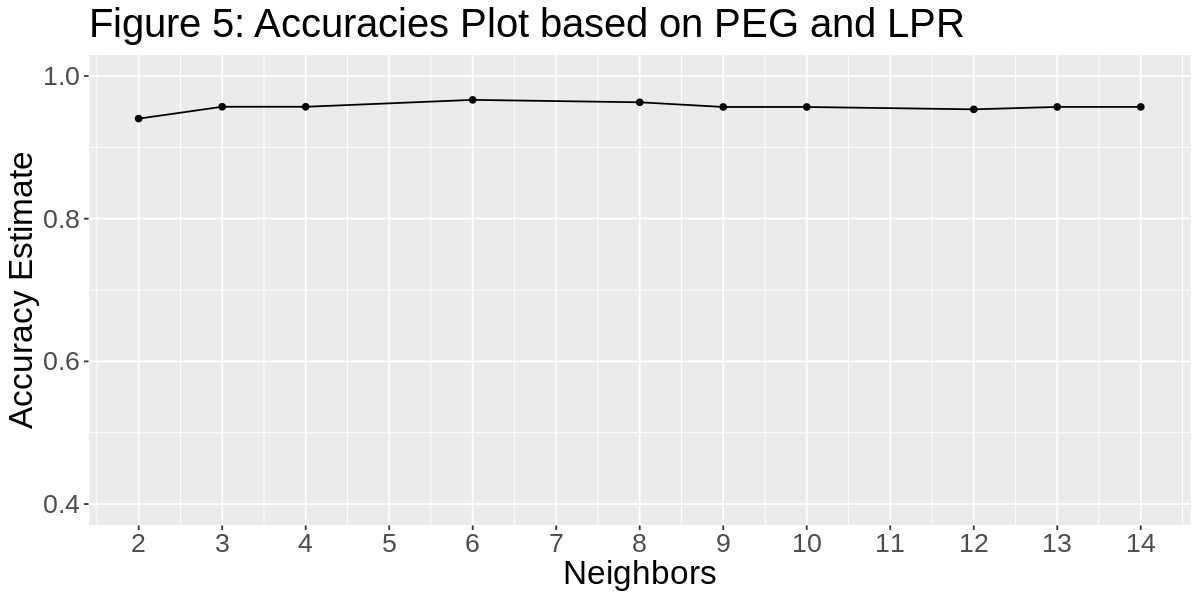

In [51]:
set.seed(2000)


knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_vfold <- vfold_cv(knowledge_data_training, v = 5, strata = UNS)

knowledge_results <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_tune) %>%
       tune_grid(resamples = knowledge_vfold, grid = 10) %>%
       collect_metrics()

options(repr.plot.height = 5, repr.plot.width = 10)

accuracies <- knowledge_results %>% 
       filter(.metric == "accuracy")

accuracies_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure 5: Accuracies Plot based on PEG and LPR") +
       scale_x_continuous(breaks = seq(0, 14, by = 1)) +  
       scale_y_continuous(limits = c(0.4, 1.0)) + 
       theme(text = element_text(size = 20)) 
 

accuracies_plot

From this accuracy plot, using two predictors (PEG and LPR) we can see that the optimized k (neighbors) = 3 at roughly 97% accuracy. We could pick any k value between 3-6, but we decided to choose an odd number to avoid an even split between the neighboring labels and a smaller number to avoid overfitting. 

In [71]:
#try change the k values

In [73]:
set.seed(2000)

knowledge_recipe <- recipe(UNS ~ PEG + LPR, data = knowledge_data_training)

knowledge_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
       set_engine("kknn") %>%
       set_mode("classification")

knowledge_fit <- workflow() %>%
       add_recipe(knowledge_recipe) %>%
       add_model(knowledge_spec) %>%
       fit(data = knowledge_data_testing)
knowledge_fit
                                   
knowledge_predictions <- predict(knowledge_fit, knowledge_data_testing) %>%
       bind_cols(knowledge_data_testing)
head(knowledge_predictions)

knowledge_metrics <- knowledge_predictions %>%
       metrics(truth = UNS, estimate = .pred_class)
knowledge_metrics

knowledge_conf_mat <- knowledge_predictions %>%
       conf_mat(truth = UNS, estimate = .pred_class)
knowledge_conf_mat
                                   
                                   

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~3, kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.07070707
Best kernel: rectangular
Best k: 3

.pred_class,STG,SCG,STR,LPR,PEG,UNS
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
High,0.15,0.275,0.80,0.21,0.81,High
Middle,0.15,0.420,0.60,0.15,0.62,Middle
Middle,0.40,0.120,0.41,0.10,0.65,Middle
High,0.66,0.360,0.56,0.40,0.83,High
Middle,0.06,0.770,0.72,0.19,0.56,Middle
High,0.31,0.200,0.46,0.78,0.83,High


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9696970
kap,multiclass,0.9580982


          Truth
Prediction Very Low High Low Middle
  Very Low       11    0   0      0
  High            0   25   0      0
  Low             1    0  31      1
  Middle          0    0   1     29

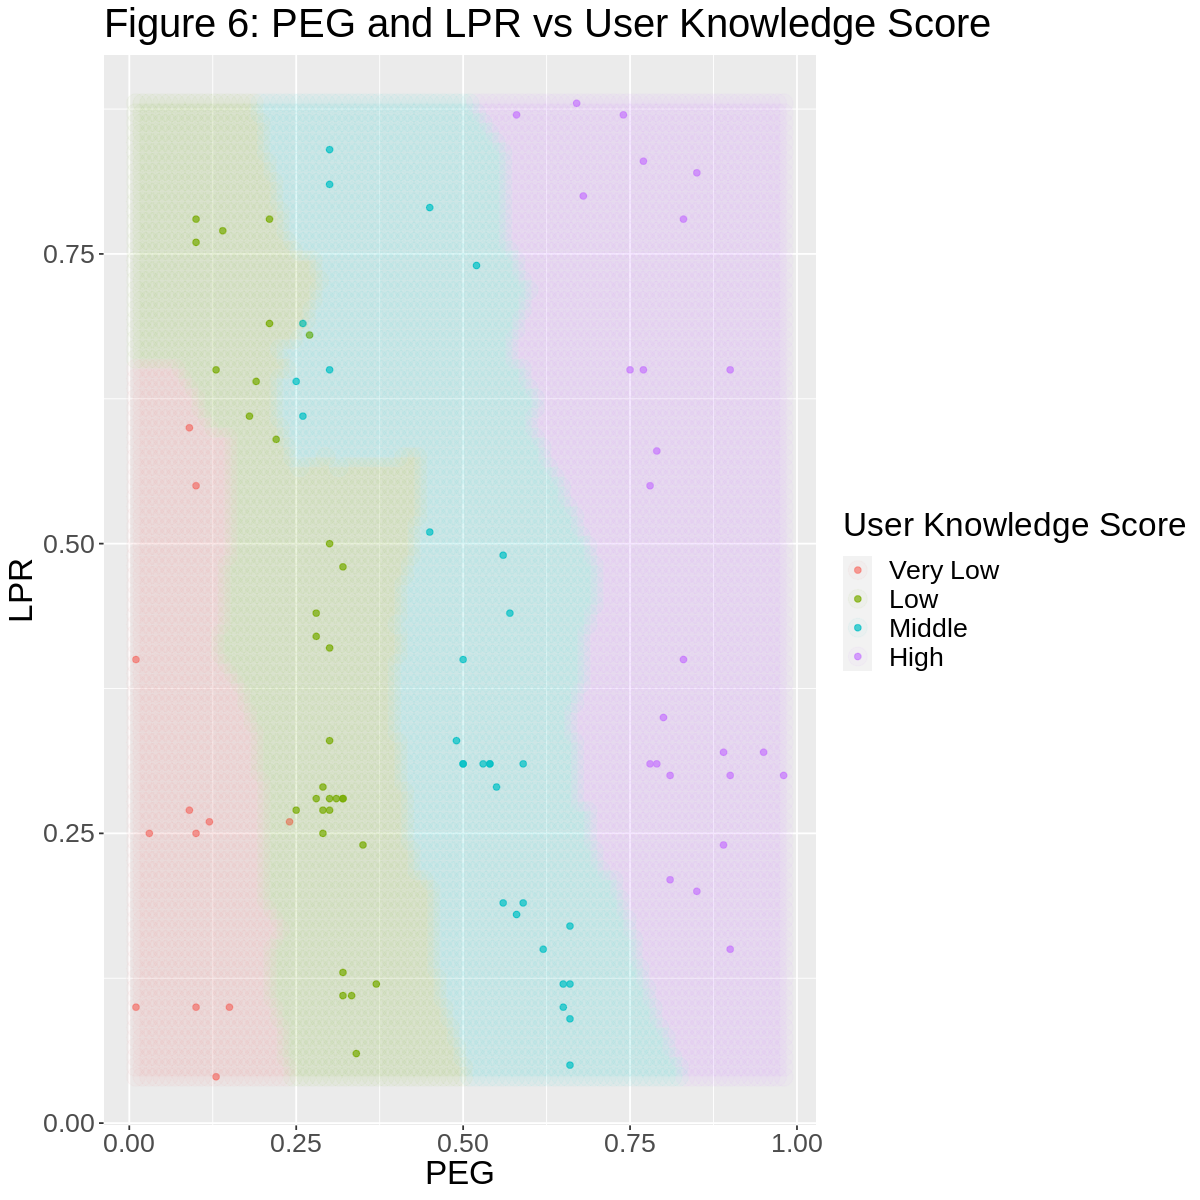

In [54]:
options(repr.plot.height = 10, repr.plot.width = 10)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) %>%
    set_engine("kknn") %>%
    set_mode("classification")
  
knn_fit <- workflow() %>%
    add_recipe(knowledge_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = knowledge_data_testing)

peg_grid <- seq(min(knowledge_data_testing$PEG), max(knowledge_data_testing$PEG), length.out = 100)
lpr_grid <- seq(min(knowledge_data_testing$LPR), max(knowledge_data_testing$LPR), length.out = 100)
scgrid <- as_tibble(expand.grid(PEG = peg_grid, LPR = lpr_grid))
knnPredGrid <- predict(knn_fit, scgrid)
prediction_table <- bind_cols(knnPredGrid, scgrid) %>% rename(UNS = .pred_class)

knowledge_predictions$UNS <- factor(knowledge_predictions$UNS, levels = c("Very Low", "Low", "Middle", "High"))

knowledge_prediction_plot <- ggplot() +
    geom_point(data = knowledge_predictions, mapping = aes(x = PEG, y = LPR, color = UNS), alpha= 0.7) +
    geom_point(data = prediction_table, mapping = aes(x = PEG, y = LPR, color = UNS), alpha = 0.03, size = 5.) +
    labs(color = "User Knowledge Score") +
    ggtitle("Figure 6: PEG and LPR vs User Knowledge Score") + 
    theme(text = element_text(size = 20))


 
knowledge_prediction_plot


The above plot identifies the solution spaces for the classification by utilizing LPR and PEG as predictors. 

From fiting our model with k (neighbors) = 3 and using PEG and LPR instead of just PEG as our predictor, our classifier increased from a 85% to a 97% accuracy

When using only PEG as our predictor, we saw a k value of 5 to be optimal from the accuracy plot and obtained a prediction accuracy of 85%. This agrees with our initial assessment of PEG being an excellent predictor due to the clear deliniation between UNS categories. 

When adding LPR as a predictor in addition to PEG, we saw many similar k values ranging from 3 to 14, but came to the conclusion that 3 offered the highest accuracy. From this we obtained a prediction accuracy of 97%, an increase of 12% from our original model which only used PEG. Thus, LPR was able to better allow our model to differentiate between categories. 

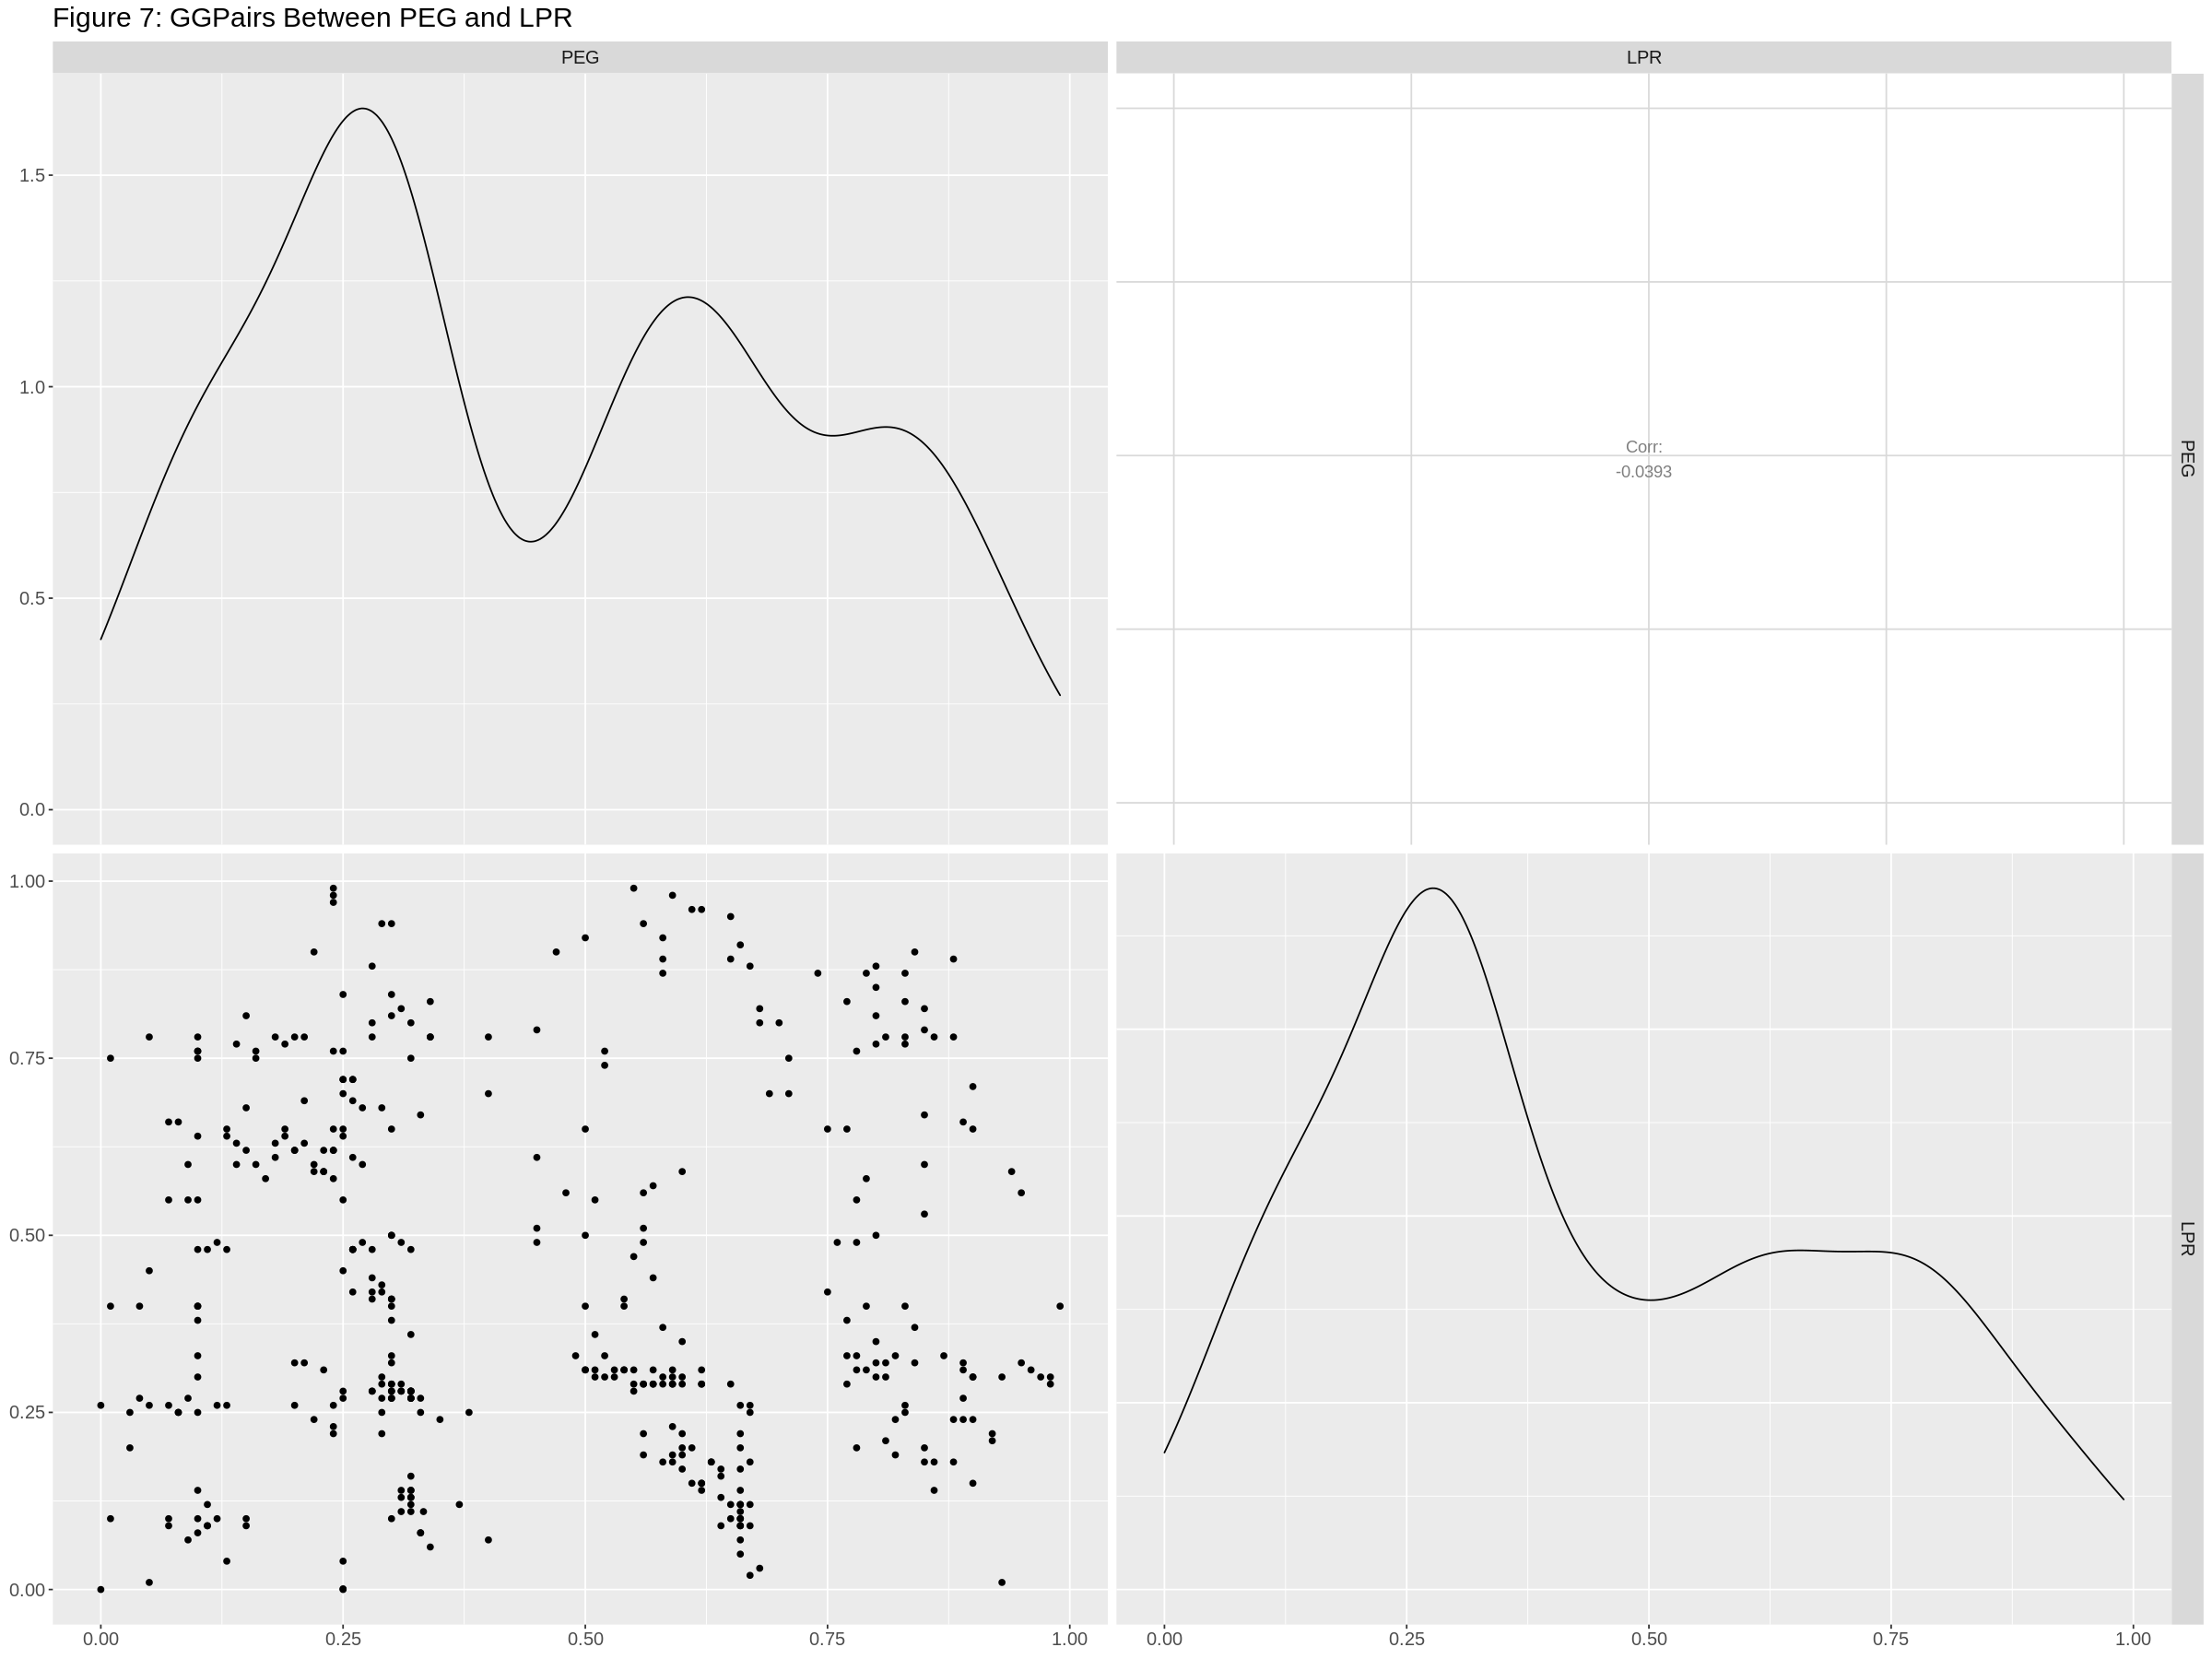

In [59]:
predictor_plot_pairs <- user_knowledge_data_randomized %>%
  select(PEG, LPR) %>%
  ggpairs() +
  ggtitle ("Figure 7: GGPairs Between PEG and LPR") +
  theme(text = element_text(size = 15))
predictor_plot_pairs

Discussion:



summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to?

<br><br>References: 

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Zeina Bitar, Abbas Sandouk, Samih Al Jabi,
Testing the Performances of DC Series Motor Used in Electric Car,
Energy Procedia,
Volume 74,
2015,
Pages 148-159,
ISSN 1876-6102,
https://doi.org/10.1016/j.egypro.2015.07.536.
(https://www.sciencedirect.com/science/article/pii/S1876610215013041)



Group 002-08: Christopher Davis, Eashan Halbe, Moira Renata, Riley Lowe